### Summary


In this project data modeling is the main goal. Models trying to explorethe connection between an response and a predictor variables. The models used here are regression models.These are the teacher evaluation and the Boston house pricing data set. Question asked are for example if "age" can support the prediction of their teacher evaluation scores, or the prediction of the house price base on size and condition. Two data sets are used for this purpose. On the way different cleaning techniques are applied and helper functions written. Also the train-test-working flow is applied to increase accuracy, validity and repeatability. Besides other packages the moderndive packages are used in the tidyverse.

### Install and call packages

In [1]:
install.packages("tidyverse", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpiGTs41\downloaded_packages


In [2]:
# Which packages were installed
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
tidyverse_packages()

[1] "broom"       "cli"         "crayon"      "dplyr"       "dbplyr"     
 [6] "forcats"     "ggplot2"     "haven"       "hms"         "httr"       
[11] "jsonlite"    "lubridate"   "magrittr"    "modelr"      "purrr"      
[16] "readr"       "readxl\n(>=" "reprex"      "rlang"       "rstudioapi" 
[21] "rvest"       "stringr"     "tibble"      "tidyr"       "xml2"       
[26] "tidyverse"

In [4]:
install.packages("moderndive", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'moderndive' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpiGTs41\downloaded_packages


In [5]:
# Description
# Datasets and wrapper functions for tidyverse-friendly introductory linear regression, used in ModernDive:
# An Introduction to Statistical and Data Sciences via R available at <http://moderndive.com/> 
# https://cran.r-project.org/web/packages/moderndive/moderndive.pdf

library(moderndive)
library(Metrics)
library(dplyr)

Warning message:
"package 'moderndive' was built under R version 3.5.3"Warning message:
"package 'Metrics' was built under R version 3.5.2"

### House Sales in King County, USA

<p>
This dataset contains house sale prices for King County, which includes Seattle. 
It consists of 19 house features plus the price and the id columns, along with 21613 observations.
It includes homes sold between May 2014 and May 2015.
It's a great dataset for evaluating simple regression models.
</p>
<p>
You can find it on
<a href="https://www.kaggle.com/harlfoxem/housesalesprediction/version/1#kc_house_data.csv",  target="_blank"> 
Kaggle.
</a>
</p>


In [6]:
# Read data set in
getwd()
path_housesales <- file.path("C:","Users","gamarandor", "data_science", "data_science_projects", "data_camp_projects", "modelselection_regression_R", "kc_house_data_csv", "kc_house_data.csv" )

housesales <- read.csv(path_housesales)

[1] "C:/Users/gamarandor/data_science/data_science_projects/data_camp_projects/modelselection_regression_R"

In [7]:
# EDA - take a look at the data
glimpse(housesales)

Observations: 21,613
Variables: 21
$ id            <dbl> 7129300520, 6414100192, 5631500400, 2487200875, 19544...
$ date          <fct> 20141013T000000, 20141209T000000, 20150225T000000, 20...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

In [8]:
names(housesales)

[1] "id"            "date"          "price"         "bedrooms"     
 [5] "bathrooms"     "sqft_living"   "sqft_lot"      "floors"       
 [9] "waterfront"    "view"          "condition"     "grade"        
[13] "sqft_above"    "sqft_basement" "yr_built"      "yr_renovated" 
[17] "zipcode"       "lat"           "long"          "sqft_living15"
[21] "sqft_lot15"

In [9]:
head((housesales))

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [10]:
tail((housesales))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,2997800021,20150219T000000,475000,3,2.50,1310,1294,2,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,263000018,20140521T000000,360000,3,2.50,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000,4,2.50,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101,2,0.75,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000,3,2.50,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21613,1523300157,20141015T000000,325000,2,0.75,1020,1076,2,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
# 21 variables, 21613 observations
dim((housesales))

[1] 21613    21

In [12]:
summary((housesales))

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [13]:
housesales_none_33 <-
housesales %>% filter(bedrooms != 33)
glimpse(housesales_none_33)

Observations: 21,612
Variables: 21
$ id            <dbl> 7129300520, 6414100192, 5631500400, 2487200875, 19544...
$ date          <fct> 20141013T000000, 20141209T000000, 20150225T000000, 20...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

In [14]:
library(scales)


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



In [15]:
Freedman_Diaconis <- function (x) 
{
    h <- stats::IQR(x)
    if (h == 0) 
        h <- stats::mad(x, constant = 2)
    if (h > 0) 
        ceiling(diff(range(x))/(2 * h * length(x)^(-1/3)))
    else 1L
}
        

In [16]:
# EDA - visualize the data
# number of bins with Freedman-Diaconis rule
number_of_bins_price <- Freedman_Diaconis(housesales$price)
number_of_bins_price 


hist_housesales <-
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=number_of_bins_price, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=3000000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=2000000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1600000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1600000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized with a histogram")+
scale_x_continuous(labels = dollar)


#try to convert scientific notation to full numbers
# not easy, see discussion
# https://stackoverflow.com/questions/14563989/force-r-to-stop-plotting-abbreviated-axis-labels-e-g-1e00-in-ggplot2


y_breaks <- format(c(0e+00, 5e-7, 1e-6, 1.5e-06, 2.0e-06), big.mark=",", scientific=FALSE)
y_breaks
class(y_breaks)
y_breaks <- as.double(y_breaks)
y_breaks
class(y_breaks)





[1] 329

[1] "0.0000000" "0.0000005" "0.0000010" "0.0000015" "0.0000020"

[1] "character"

[1] 0.0e+00 5.0e-07 1.0e-06 1.5e-06 2.0e-06

[1] "numeric"

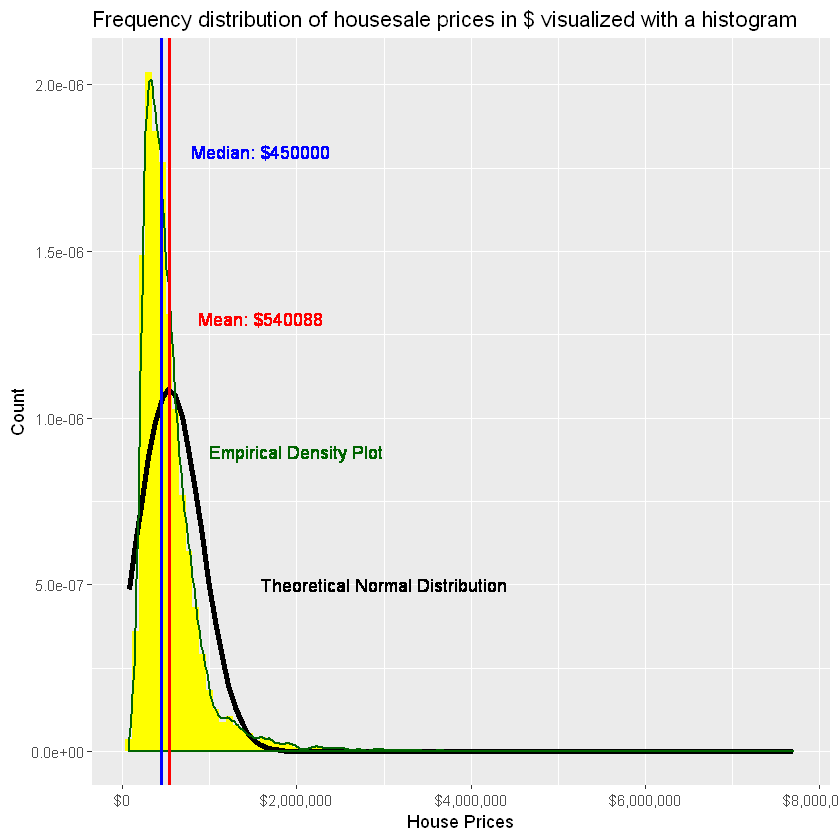

In [17]:
# only 100 bins


hist_housesales_100_bins <- 
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=100, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=3000000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=2000000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1600000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1600000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized with a histogram")+ 
scale_x_continuous(labels = dollar)

hist_housesales_100_bins



Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 198 rows containing non-finite values (stat_bin)."Warning message:
"Removed 198 rows containing non-finite values (stat_density)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

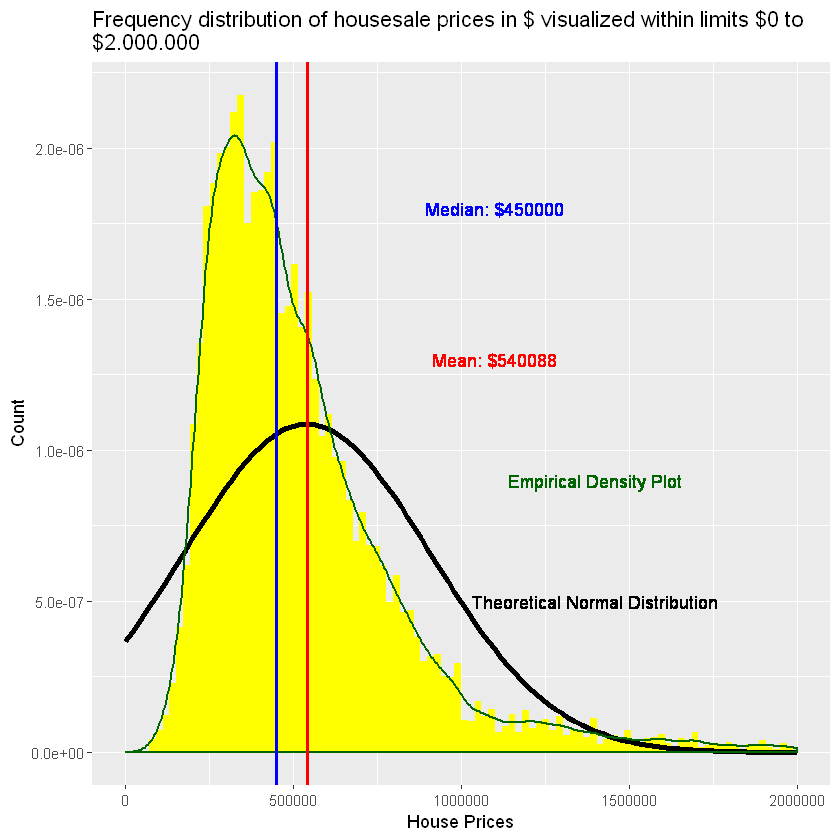

In [18]:

hist_housesales_100_xlim <- 
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=100, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=1400000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=1400000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1100000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1100000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized within limits $0 to \n$2.000.000")+ 
scale_x_continuous(labels = dollar)+
xlim(0, 2000000)


hist_housesales_100_xlim

suppressWarnings(warning(hist_housesales_100_xlim))



`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


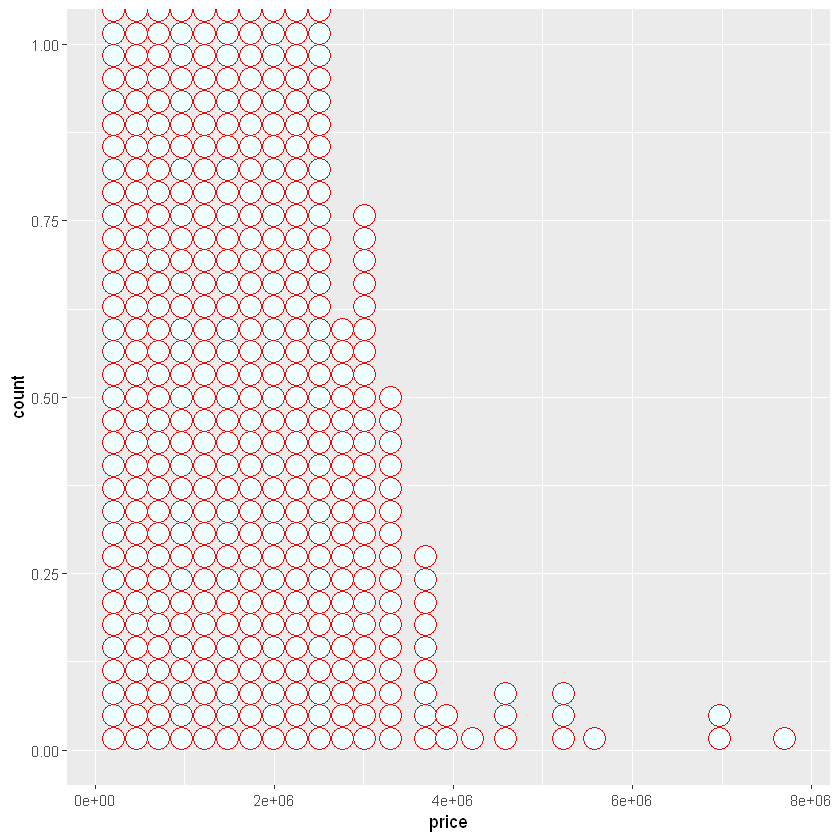

In [19]:
# Transform house prices with the logarithm to the basis 10
# The house prices are within the range 0 to 8.000.000
# The range creates a distribution with a long tail to the right 
# Or: the distribution is right skewed
# a dot plot helps tho see this better
# a logarithmic transformation of the x-values (house prices) minimize the influence of outliers on the distribution
# but a logarithmic transformation preserves order or is monotonic
# logarithmic graph: weights differences in the beginning higher than in the ending
# inverse of the exponential graph
# helps to see differences in bulks (beginning), and reduces thes weight of outliers (ending)

ggplot(housesales, aes(x=price)) + geom_dotplot(color="red", fill="azure")



In [20]:
housesales <-
housesales %>% mutate(log10_prices = log10(price))
names(housesales)
glimpse(housesales)

housesales %>% dplyr::select(price, log10_prices) %>% head()


[1] "id"            "date"          "price"         "bedrooms"     
 [5] "bathrooms"     "sqft_living"   "sqft_lot"      "floors"       
 [9] "waterfront"    "view"          "condition"     "grade"        
[13] "sqft_above"    "sqft_basement" "yr_built"      "yr_renovated" 
[17] "zipcode"       "lat"           "long"          "sqft_living15"
[21] "sqft_lot15"    "log10_prices"

Observations: 21,613
Variables: 22
$ id            <dbl> 7129300520, 6414100192, 5631500400, 2487200875, 19544...
$ date          <fct> 20141013T000000, 20141209T000000, 20150225T000000, 20...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

price,log10_prices
221900,5.346157
538000,5.730782
180000,5.255273
604000,5.781037
510000,5.707570
1225000,6.088136


In [21]:
install.packages("gridExtra",repos = c("http://rstudio.org/_packages", "http://cran.rstudio.com"))
library(gridExtra)



Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://rstudio.org/_packages/bin/windows/contrib/3.5:
  kann URL 'http://rstudio.org/_packages/bin/windows/contrib/3.5/PACKAGES' nicht öffnen"

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpiGTs41\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



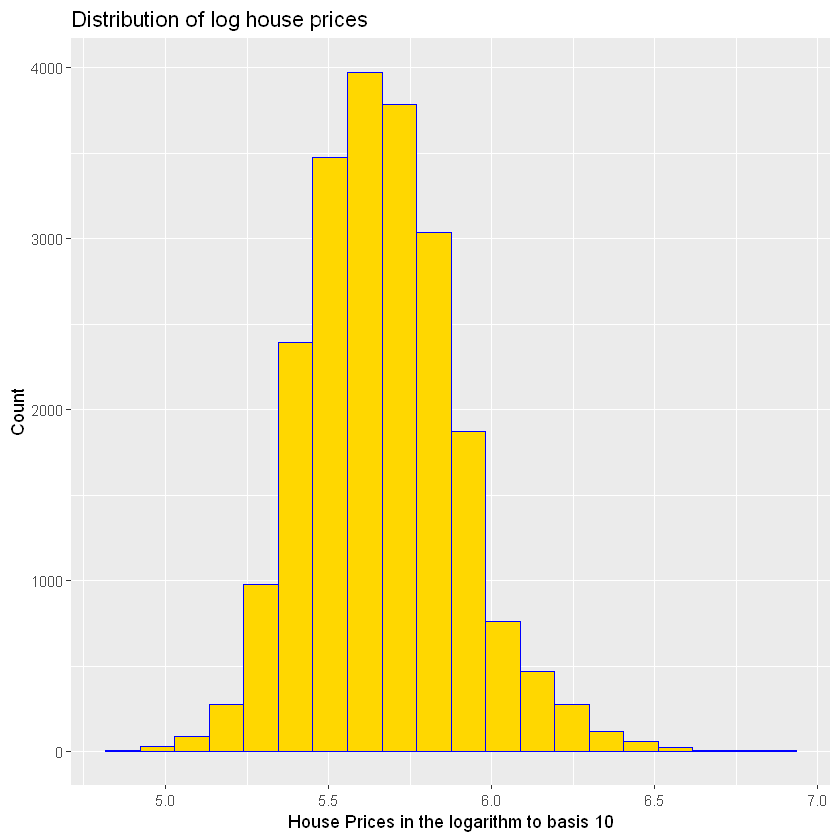

In [22]:
# EDA- visualize transformed house prices
# The distribution is similar to a normal distribution
housesales_prices_hist <-
housesales %>% ggplot(aes(x=price)) + geom_histogram(fill="gold", color="blue")+
labs(y="Count", x="House Prices")


housesales_log_hist <-
housesales %>% ggplot(aes(x=log10_prices)) + 
geom_histogram(fill="gold", color="blue", bins=20)+
labs(y="Count", x="House Prices in the logarithm to basis 10", title="Distribution of log house prices")

housesales_log_hist

In [23]:
# EDA - waterfront

housesales %>% dplyr::select(price, waterfront) %>% glimpse()
unique(housesales$waterfront)
# waterfront is categorical, but has got type integer
# convert to factor
housesales_price_waterfront <-
housesales %>% dplyr::select(price, waterfront) %>% mutate(waterfront = as.factor(waterfront))
str(housesales_price_waterfront )
summary(housesales_price_waterfront )
head(housesales_price_waterfront )
tail(housesales_price_waterfront )

Observations: 21,613
Variables: 2
$ price      <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500,...
$ waterfront <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...


[1] 0 1

'data.frame':	21613 obs. of  2 variables:
 $ price     : num  221900 538000 180000 604000 510000 ...
 $ waterfront: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


     price         waterfront
 Min.   :  75000   0:21450   
 1st Qu.: 321950   1:  163   
 Median : 450000             
 Mean   : 540088             
 3rd Qu.: 645000             
 Max.   :7700000             

price,waterfront
221900,0
538000,0
180000,0
604000,0
510000,0
1225000,0


,price,waterfront
21608,475000,0
21609,360000,0
21610,400000,0
21611,402101,0
21612,400000,0
21613,325000,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


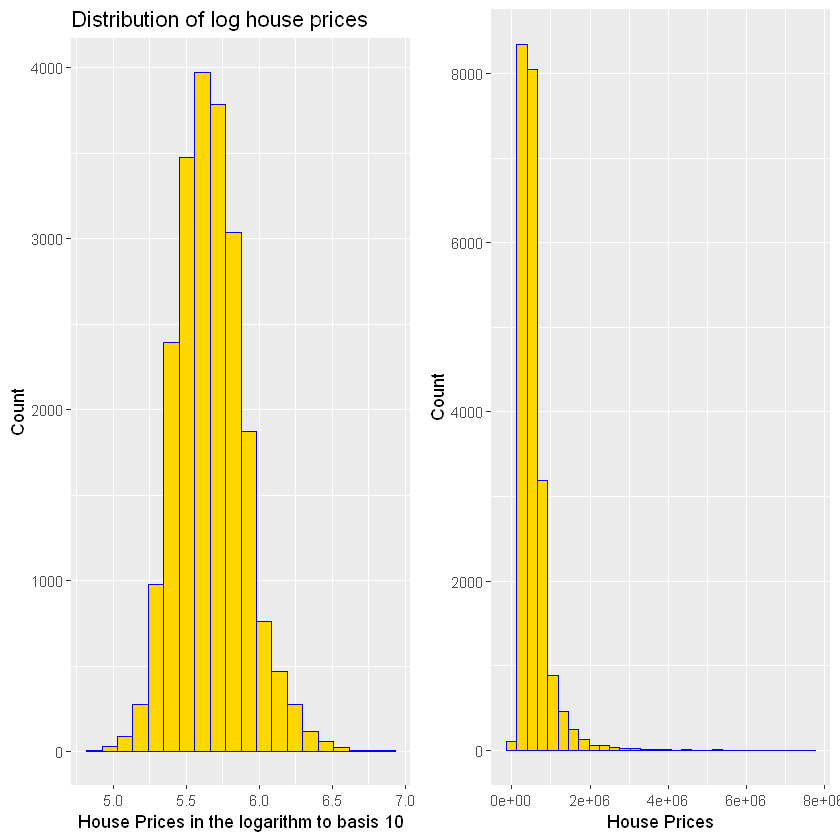

In [24]:
grid.arrange(housesales_log_hist, housesales_prices_hist, ncol=2)

In [25]:
#compute summary statistics by waterfront or none
housesales %>% group_by(waterfront) %>% 
summarize(Median= median(log10_prices),
          Quantile_25=quantile(log10_prices, probs = c(0.25), na.rm = FALSE, names = TRUE),
          Quantile_75=quantile(log10_prices, probs = c(0.75), na.rm = FALSE, names = TRUE),
          Maximum=max(log10_prices),
          Minimum=min(log10_prices))

waterfront,Median,Quantile_25,Quantile_75,Maximum,Minimum
0,5.653213,5.505150,5.806110,6.886491,4.875061
1,6.146128,5.880776,6.345364,6.848958,5.454845


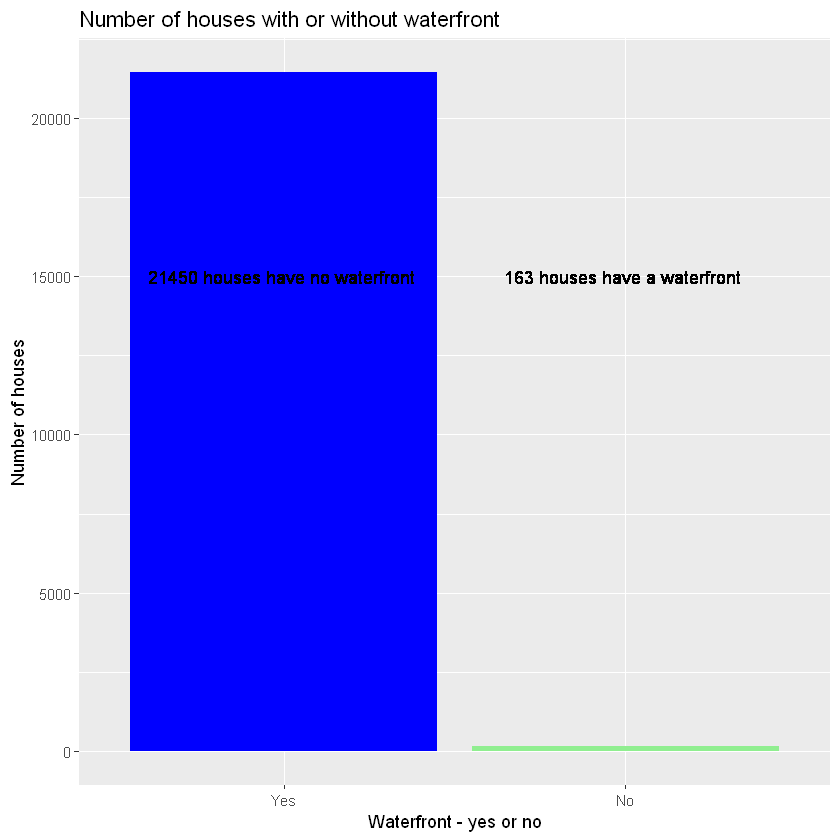

In [26]:
housesales_price_waterfront %>% 
ggplot(aes(x=waterfront)) + geom_bar(fill=c("blue", "lightgreen"))+
geom_text(aes(x=1, y=15000, label="21450 houses have no waterfront "))+
geom_text(aes(x=2, y=15000, label="163 houses have a waterfront "))+ 
labs(x="Waterfront - yes or no", y= "Number of houses", title="Number of houses with or without waterfront")+
scale_x_discrete(breaks = c(0, 1),label = c("Yes", "No"))
# Assumption: waterfront houses are rare and more attractive - as such they incur higher prices

#### Predict house price by categorical variable waterfront using regression

 num [1:21613] 5.35 5.73 5.26 5.78 5.71 ...


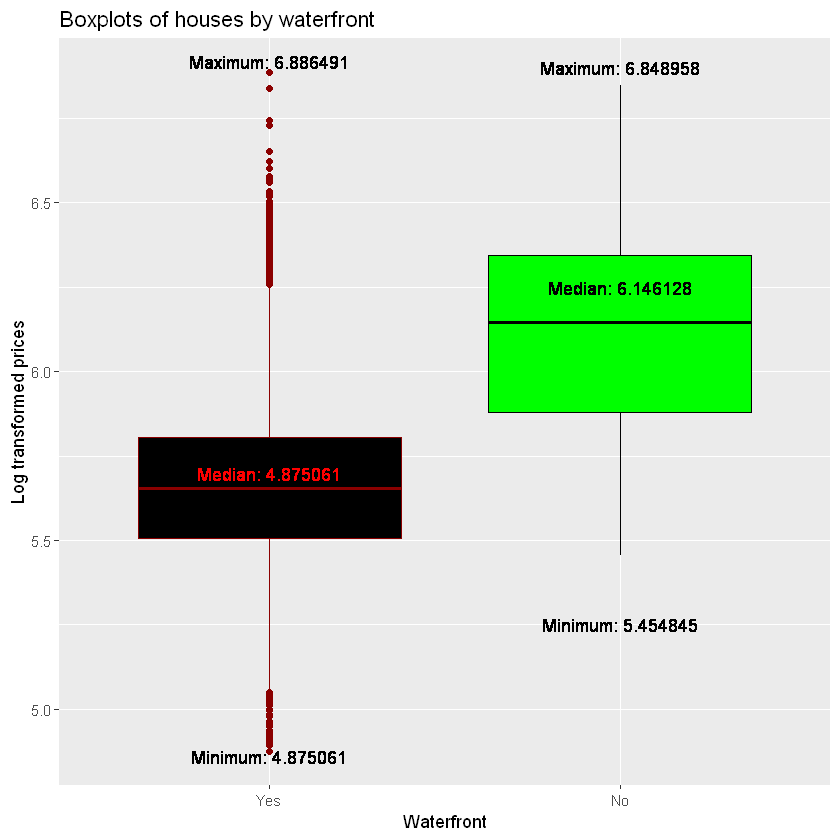

In [27]:
# visualize the relationship between price by waterfront using the log transformed prices

glimpse(housesales$log10_prices)


housesales %>% ggplot(aes(x=as.factor(waterfront), y=log10_prices, group=waterfront)) + 
geom_boxplot(color=c("darkred", "black"), fill=c("black", "green"))+
labs(y="Log transformed prices", x="Waterfront", title="Boxplots of houses by waterfront ")+
geom_text(x=1, y=6.92, label="Maximum: 6.886491")+
geom_text(x=1, y=4.86, label="Minimum: 4.875061")+
geom_text(x=1, y=5.7, label="Median: 4.875061", color="red")+
geom_text(x=2, y=6.9, label="Maximum: 6.848958")+
geom_text(x=2, y=5.25, label="Minimum: 5.454845")+
geom_text(x=2, y=6.25 , label="Median: 6.146128", color="black")+
scale_x_discrete(breaks = c(0, 1),label = c("Yes", "No"))

# the median of house prices with waterfront is greater than without
# houseprices increase by waterfront
          
          

In [28]:
# Approaching prediction using the average of house prices
# the average is the predicition of a house price
# in general this method delivers not good predictions



housesale_averages <- 
housesales %>% group_by(waterfront) %>% summarize(Average_houseprices=mean(price), 
                                                  Average_log_houseprices= mean(log10_prices))
housesale_averages 
glimpse(housesale_averages)
housesale_averages$Average_log_houseprices

housesale_averages <- housesale_averages %>% mutate(Log_Reversed=10^(Average_log_houseprices))
housesale_averages
# the reversed log transformed prices are more normal and account better for the skewness of the distributions
# On average you would expect to pay $1332566.9 for a house with waterfront

waterfront,Average_houseprices,Average_log_houseprices
0,531563.6,5.663114
1,1661876.0,6.124689


Observations: 2
Variables: 3
$ waterfront              <int> 0, 1
$ Average_houseprices     <dbl> 531563.6, 1661876.0
$ Average_log_houseprices <dbl> 5.663114, 6.124689


[1] 5.663114 6.124689

waterfront,Average_houseprices,Average_log_houseprices,Log_Reversed
0,531563.6,5.663114,460377.2
1,1661876.0,6.124689,1332566.9


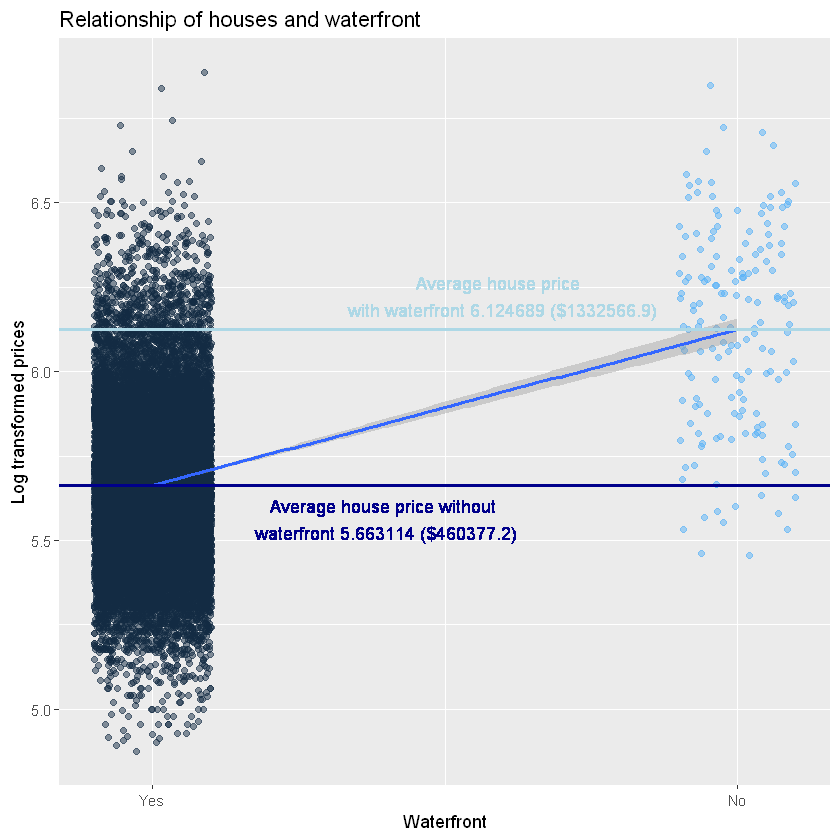

In [29]:
housesales %>%
ggplot(aes(x=waterfront,y=log10_prices, color=waterfront))+
geom_jitter(alpha=0.5, width=0.1)+
geom_smooth(method="lm")+
geom_hline(yintercept=5.663114, color="darkblue", size=1)+
geom_text(x=0.4, y= 5.663114 -0.1, 
          label="Average house price without \nwaterfront 5.663114 ($460377.2)", 
          color="darkblue" )+
geom_hline(yintercept=6.124689 , color="lightblue", size=1)+
geom_text(x=0.6, y= 6.124689 + 0.1, 
          label="Average house price  \nwith waterfront 6.124689 ($1332566.9)", color="lightblue" )+
labs(y="Log transformed prices", x="Waterfront", title="Relationship of houses and waterfront ")+
guides(colour=FALSE)+
scale_x_continuous(breaks = c(0, 1),label = c("Yes", "No"))

####  Modeling the relationships between house prices and the other variables using linear regression

In [30]:
housesales <-
housesales %>% mutate(log10_prices = log10(price))
names(housesales)
glimpse(housesales)

housesales %>% dplyr::select(price, log10_prices) %>% head()

[1] "id"            "date"          "price"         "bedrooms"     
 [5] "bathrooms"     "sqft_living"   "sqft_lot"      "floors"       
 [9] "waterfront"    "view"          "condition"     "grade"        
[13] "sqft_above"    "sqft_basement" "yr_built"      "yr_renovated" 
[17] "zipcode"       "lat"           "long"          "sqft_living15"
[21] "sqft_lot15"    "log10_prices"

Observations: 21,613
Variables: 22
$ id            <dbl> 7129300520, 6414100192, 5631500400, 2487200875, 19544...
$ date          <fct> 20141013T000000, 20141209T000000, 20150225T000000, 20...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

price,log10_prices
221900,5.346157
538000,5.730782
180000,5.255273
604000,5.781037
510000,5.707570
1225000,6.088136


In [31]:
housesales_none_33 <-
housesales_none_33 %>% mutate(log10_prices = log10(price))
names(housesales_none_33)
glimpse(housesales_none_33)

housesales_none_33 %>% dplyr::select(price, log10_prices) %>% head()

[1] "id"            "date"          "price"         "bedrooms"     
 [5] "bathrooms"     "sqft_living"   "sqft_lot"      "floors"       
 [9] "waterfront"    "view"          "condition"     "grade"        
[13] "sqft_above"    "sqft_basement" "yr_built"      "yr_renovated" 
[17] "zipcode"       "lat"           "long"          "sqft_living15"
[21] "sqft_lot15"    "log10_prices"

Observations: 21,612
Variables: 22
$ id            <dbl> 7129300520, 6414100192, 5631500400, 2487200875, 19544...
$ date          <fct> 20141013T000000, 20141209T000000, 20150225T000000, 20...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

price,log10_prices
221900,5.346157
538000,5.730782
180000,5.255273
604000,5.781037
510000,5.707570
1225000,6.088136


In [32]:
# simple linear regression of predicting houseprices (log) with waterfront

housesales$waterfront <- factor(housesales$waterfront )

simple_linear_regression_logprice_waterfront <- 
lm( log10_prices ~ waterfront, data=housesales_none_33)

simple_linear_regression_logprice_waterfront

summary(simple_linear_regression_logprice_waterfront)

get_regression_table(simple_linear_regression_logprice_waterfront)

# Interpretation: the p-value of the waterfront variable is smaller than we would
# expect if there was not a relationship between price and waterfront
# Null-hypthesis: the relationship is zero - is rejected
# Alternative hypothesis is not rejected - a waterfront influences house prices


Call:
lm(formula = log10_prices ~ waterfront, data = housesales_none_33)

Coefficients:
(Intercept)   waterfront  
     5.6631       0.4616  



Call:
lm(formula = log10_prices ~ waterfront, data = housesales_none_33)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78805 -0.15796 -0.00989  0.14307  1.22338 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.663107   0.001538 3682.38   <2e-16 ***
waterfront  0.461582   0.017708   26.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2252 on 21610 degrees of freedom
Multiple R-squared:  0.03048,	Adjusted R-squared:  0.03044 
F-statistic: 679.4 on 1 and 21610 DF,  p-value: < 2.2e-16


term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.663,0.002,3682.384,0,5.660,5.666
waterfront,0.462,0.018,26.066,0,0.427,0.496


In [33]:
# rmse(truth, response)
# install.packages( "measures", repos = c("http://rstudio.org/_packages", "http://cran.rstudio.com"))
library("measures")
# rmse(truth, response)


predict_reg_log_water <- predict(simple_linear_regression_logprice_waterfront)

predict_reg_log_water[1:4]
unique(predict_reg_log_water )


df_prices_log <- data.frame(Act_Logprices=housesales$log10_prices[1:21612],
                            Pred_Logprices_Water=predict_reg_log_water[1:21612])

df_prices_log <- 
df_prices_log %>%
mutate(Residuals =  Act_Logprices-Pred_Logprices_Water)

head(df_prices_log )

head(get_regression_points(simple_linear_regression_logprice_waterfront))

df_prices_log_6 <- 
df_prices_log[df_prices_log$Pred_Logprices_Water == 6.12468901902678,]
head(df_prices_log_6)

rmse_prices_water_log <- rmse(df_prices_log$Act_Logprices, df_prices_log$Pred_Logprices_Water)
paste("Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront: ",
      round(rmse_prices_water_log, 2))

intercept = 5.663114 + 0.461575
paste("Intercept: ", intercept)

# Conclusion: 
# The intercepts is the difference between a waterfront 
# predicting a dependent numerical variable like price with categorical variable like waterfront
# if there is not a waterfront the price prediction is the intercept of 5.66311379973611
# if there is a waterfront the price predictions is the intercept + the slope
# 5.663114 + 0.461575 = 6.124689
# In case of categorical variables the group means are the predictions.
# Naturally a prediction on one categorical variable cannot make good predictions and is static

1        2        3        4 
5.663107 5.663107 5.663107 5.663107

[1] 5.663107 6.124689

Act_Logprices,Pred_Logprices_Water,Residuals
5.346157,5.663107,-0.31694983
5.730782,5.663107,0.06767515
5.255273,5.663107,-0.40783462
5.781037,5.663107,0.11792981
5.707570,5.663107,0.04446305
6.088136,5.663107,0.42502896


ID,log10_prices,waterfront,log10_prices_hat,residual
1,5.346,0,5.663,-0.317
2,5.731,0,5.663,0.068
3,5.255,0,5.663,-0.408
4,5.781,0,5.663,0.118
5,5.708,0,5.663,0.044
6,6.088,0,5.663,0.425


Act_Logprices,Pred_Logprices_Water,Residuals


[1] "Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront:  0.23"

[1] "Intercept:  6.124689"

In [34]:
# An alternative measure of goodness of fit is the squared sum of residuals
# In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) 
# or the sum of squared errors of prediction (SSE), 
# is the sum of the squares of residuals (deviations predicted from actual empirical values of data). 
# https://en.wikipedia.org/wiki/Residual_sum_of_squares

head(get_regression_points(simple_linear_regression_logprice_waterfront))
get_regression_points(simple_linear_regression_logprice_waterfront)  %>%
mutate(Squared_residuals=residual^2) %>%
summarize(Sum_squared_Residuals_SSR=sum(Squared_residuals))

# With a perfect model fit of 0 a value of 1096.302 is not a good model fit

ID,log10_prices,waterfront,log10_prices_hat,residual
1,5.346,0,5.663,-0.317
2,5.731,0,5.663,0.068
3,5.255,0,5.663,-0.408
4,5.781,0,5.663,0.118
5,5.708,0,5.663,0.044
6,6.088,0,5.663,0.425


Sum_squared_Residuals_SSR
1096.288


In [35]:
# reverse transformation

predict_reg_log_water <- 10^(df_prices_log$Pred_Logprices_Water)
Act_prices <- 10^(df_prices_log$Act_Logprices)

df_prices_water <- 
data.frame(Actual_prices=Act_prices , Predicted_prices=predict_reg_log_water) %>%
mutate(Residuals=Actual_prices-Predicted_prices)

df_prices_water <- 
df_prices_water %>% mutate(Squared_Residuals= Residuals^2) 

head(df_prices_water)

df_prices_water %>% summarize(Sum_Squared_Residuals=sum(Squared_Residuals))

# SSR: is very high - 2832612000000000

rmse_prices_water_dollar <-
rmse(df_prices_water$Actual_prices  , df_prices_water$Predicted_prices)

paste("Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront: ", "$",
      round(rmse_prices_water_dollar, 2))

sum(df_prices_water$Residuals)

Actual_prices,Predicted_prices,Residuals,Squared_Residuals
221900,460370.1,-238470.12,56867998830
538000,460370.1,77629.88,6026398042
180000,460370.1,-280370.12,78607405009
604000,460370.1,143629.88,20629542009
510000,460370.1,49629.88,2463124844
1225000,460370.1,764629.88,584658851152


Sum_Squared_Residuals
2.892645e+15


[1] "Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront:  $ 365847.49"

[1] 1580912869

#### Predicting houseprices with a multiple linear regression model 

In [36]:

housesales_none_33 <-
housesales_none_33 %>% mutate(log10_square = log10(sqft_living))
names(housesales_none_33)

housesales_none_33 %>% dplyr::select(sqft_living, log10_square) %>% head()


[1] "id"            "date"          "price"         "bedrooms"     
 [5] "bathrooms"     "sqft_living"   "sqft_lot"      "floors"       
 [9] "waterfront"    "view"          "condition"     "grade"        
[13] "sqft_above"    "sqft_basement" "yr_built"      "yr_renovated" 
[17] "zipcode"       "lat"           "long"          "sqft_living15"
[21] "sqft_lot15"    "log10_prices"  "log10_square"

sqft_living,log10_square
1180,3.071882
2570,3.409933
770,2.886491
1960,3.292256
1680,3.225309
5420,3.733999


In [37]:


# building a linear regression model with one categorical variable and one numerical variable

reg_model_sf_water <-
lm(log10_prices ~ log10_square + waterfront, data=housesales_none_33)

get_regression_table(reg_model_sf_water)

reg_model_sf_water_pred <- 
predict(reg_model_sf_water)

head(reg_model_sf_water_pred)


term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,2.960,0.020,146.394,0,2.920,2.999
log10_square,0.825,0.006,133.944,0,0.813,0.837
waterfront,0.322,0.013,24.529,0,0.296,0.348


1        2        3        4        5        6 
5.493267 5.772095 5.340354 5.675034 5.619815 6.039388

In [38]:
# build a regression model with prices predicted by year built and square feet
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors
# is year built a categorical variable or a numerical variable?

housesales <-
housesales %>% mutate(yr_built_as_factor = factor(yr_built))

reg_model_price_yr_sf <-
lm(log10_prices~log10_square+yr_built , data=housesales_none_33 )


get_regression_table(reg_model_price_yr_sf)
reg_model_price_yr_sf_pred <-
predict(reg_model_price_yr_sf)



# As none houses were built in year 0 the intercept is meaningless
# For every year (unit) the price decreases by -0.001
# For every square feet (unit) the price increases by 0.913




term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.383,0.075,71.394,0,5.235,5.530
log10_square,0.913,0.006,141.100,0,0.901,0.926
yr_built,-0.001,0.000,-33.830,0,-0.001,-0.001


In [39]:
# build a regression model with prices predicted by year built and square feet
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors
# is year built a categorical variable or a numerical variable?

housesales <-
housesales %>% mutate(yr_built_as_factor = factor(yr_built))

reg_model_price_yr_sf <-
lm(log10_prices~log10_square+yr_built , data=housesales_none_33 )


get_regression_table(reg_model_price_yr_sf)
reg_model_price_yr_sf_pred <-
predict(reg_model_price_yr_sf)



# As none houses were built in year 0 the intercept is meaningless
# For every year (unit) the price decreases by -0.001
# For every square feet (unit) the price increases by 0.913


term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.383,0.075,71.394,0,5.235,5.530
log10_square,0.913,0.006,141.100,0,0.901,0.926
yr_built,-0.001,0.000,-33.830,0,-0.001,-0.001


In [40]:
# Model assesment

rmse_reg_model_price_yr_sf <-
rmse(housesales_none_33$log10_prices, reg_model_price_yr_sf_pred)

RSS_reg_model_price_yr_sf  <-
get_regression_points(reg_model_price_yr_sf ) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

R_squared_reg_model_price_yr_sf_extracted <- summary(reg_model_price_yr_sf )$adj.r.squared

TSS_squared_reg_model_price_yr <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)

R_squared_reg_model_price_yr_calculated <- 1- RSS_reg_model_price_yr_sf / TSS_squared_reg_model_price_yr 

paste("rmse: ", RSS_reg_model_price_yr_sf )
paste("R_square_extracted: ", R_squared_reg_model_price_yr_sf_extracted )
paste("R_squared_calculated: ", R_squared_reg_model_price_yr_calculated)
paste("RSS: ", RSS_reg_model_price_yr_sf)


TSS_all <- TSS_squared_reg_model_price_yr

[1] "rmse:  584.686085"

[1] "R_square_extracted:  0.482871160085952"

[1] "R_squared_calculated:  0.482910696541082"

[1] "RSS:  584.686085"

In [41]:
# Model assesment

paste("rmse: ", rmse(housesales$log10_prices, reg_model_sf_water_pred ))

get_regression_points <- 
get_regression_points(reg_model_sf_water)

reg_model_sf_water_RSS <-
get_regression_points %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", reg_model_sf_water_RSS)

reg_model_sf_water_pred_points <-
get_regression_points %>% mutate(Pred_log=reg_model_sf_water_pred, Pred_absolute = 10^reg_model_sf_water_pred )


reg_model_sf_water_R_squared <- 
1- (reg_model_sf_water_RSS / TSS_all)

paste("R-squared_extracted: ", summary(reg_model_sf_water)$adj.r.squared)
paste("R-squared_calculated: ", reg_model_sf_water_R_squared)

Warning message in actual - predicted:
"Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes"

[1] "rmse:  0.200802152675168"

[1] "RSS:  598.950857"

[1] "R-squared_extracted:  0.470232703502078"

[1] "R-squared_calculated:  0.470295104676124"

In [42]:
# As both price and square feet are skewed a log transformation can help to make the distribution more normal
# The log prices are allready given with log10_prices
# Square feet is transformed now

housesales <-
housesales %>% mutate(log10_square = log10(sqft_living))
names(housesales)

housesales %>% dplyr::select(sqft_living, log10_square) %>% head()


[1] "id"                 "date"               "price"             
 [4] "bedrooms"           "bathrooms"          "sqft_living"       
 [7] "sqft_lot"           "floors"             "waterfront"        
[10] "view"               "condition"          "grade"             
[13] "sqft_above"         "sqft_basement"      "yr_built"          
[16] "yr_renovated"       "zipcode"            "lat"               
[19] "long"               "sqft_living15"      "sqft_lot15"        
[22] "log10_prices"       "yr_built_as_factor" "log10_square"

sqft_living,log10_square
1180,3.071882
2570,3.409933
770,2.886491
1960,3.292256
1680,3.225309
5420,3.733999


In [43]:
# predictions with new data

housesales %>% summarize(Minimum=min(log10_square), Maximum=max(log10_square))

# generate random data point

radom_sf_15 <- 
runif(15, min =2.3, max=4.2)

random_water_15 <-
floor(runif(15, min=0, max=2))

radom_sf_21612 <- 
runif(21612, min =2.3, max=4.2)

random_water_21612 <-
floor(runif(21612, min=0, max=2))


new_data_242342 <-
data_frame(log10_square=radom_sf_21612,
           waterfront=factor(random_water_21612))







Minimum,Maximum
2.462398,4.131619


In [44]:
new_data_242342$waterfront = as.numeric(as.character(new_data_242342$waterfront))
new_data_242342[1:10,]
glimpse(new_data_242342)

log10_square,waterfront
4.054035,1
3.525897,1
2.306748,1
2.773666,0
3.489732,1
2.600618,0
2.873267,0
2.300164,0
2.907974,0
3.505791,0


Observations: 21,612
Variables: 2
$ log10_square <dbl> 4.054035, 3.525897, 2.306748, 2.773666, 3.489732, 2.60...
$ waterfront   <dbl> 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...


In [45]:
# use get_regression_points for prediction

ttt5454 <- get_regression_points(reg_model_sf_water, newdata=new_data_242342) %>% mutate(price_absolute=10^log10_prices_hat)
head(ttt5454)


ID,log10_square,waterfront,log10_prices_hat,price_absolute
1,4.054,1,6.625,4216965.0
2,3.526,1,6.190,1548816.6
3,2.307,1,5.184,152756.6
4,2.774,0,5.247,176603.8
5,3.490,1,6.160,1445439.8
6,2.601,0,5.105,127350.3


In [46]:
# doing the same using predict
predict_nd_log <- predict(reg_model_sf_water, newdata=new_data_242342)
predict_nd_absolute <- 10^predict_nd_log
predict_nd_absolute[0:10]
zzz100 <- cbind(new_data_242342, predict_nd_absolute )

1          2          3          4          5          6          7 
4221375.62 1548246.94  152852.74  176723.67 1445476.48  127222.28  213524.09 
         8          9         10 
  71902.69  228072.99  709837.87

[1] "id"                 "date"               "price"             
 [4] "bedrooms"           "bathrooms"          "sqft_living"       
 [7] "sqft_lot"           "floors"             "waterfront"        
[10] "view"               "condition"          "grade"             
[13] "sqft_above"         "sqft_basement"      "yr_built"          
[16] "yr_renovated"       "zipcode"            "lat"               
[19] "long"               "sqft_living15"      "sqft_lot15"        
[22] "log10_prices"       "yr_built_as_factor" "log10_square"

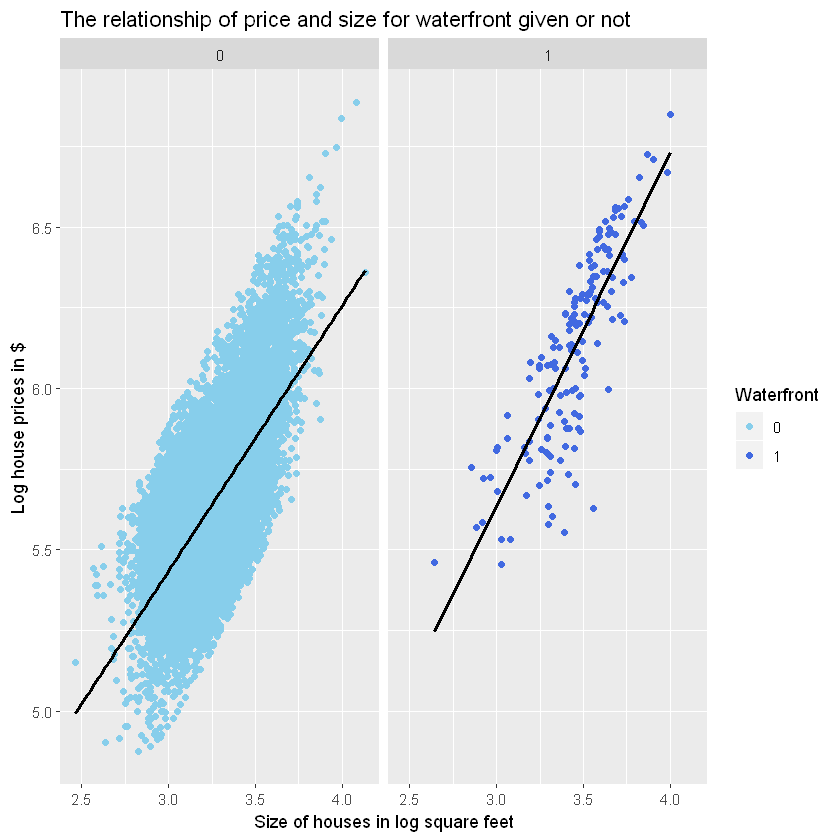

In [47]:
names(housesales)

housesales %>% ggplot(aes(x= log10_square , y=log10_prices, color=factor(waterfront))) +
geom_point()+
geom_smooth(method="lm", se=FALSE, color="black")+
facet_wrap(.~factor(waterfront))+
labs(x="Size of houses in log square feet", y="Log house prices in $ ", 
     title="The relationship of price and size for waterfront given or not")+
scale_color_manual( values= c("skyblue", "royalblue"), name="Waterfront")



In [48]:
# select variables with intuition assuming these as good predictor variables

housesales %>% dplyr::select(price, sqft_living, condition, waterfront) %>% glimpse()


Observations: 21,613
Variables: 4
$ price       <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500...
$ sqft_living <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 18...
$ condition   <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4...
$ waterfront  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


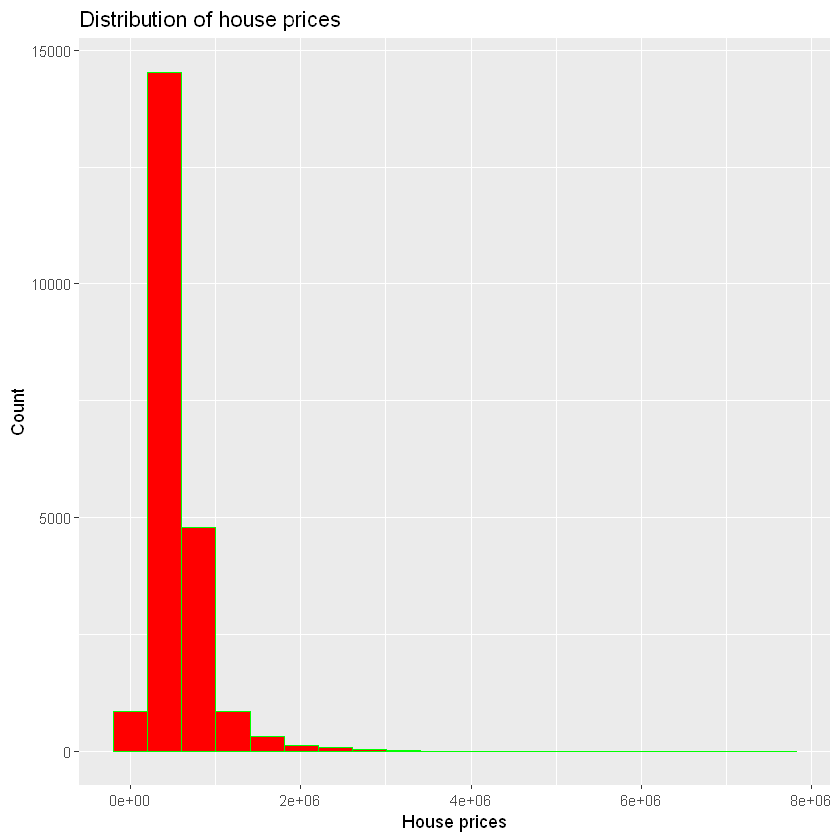

In [49]:
# histograms of variables
# Estimating skewness

hist_price <-
housesales %>% ggplot(aes(x=price)) +
geom_histogram(color="green", fill="red", bins=20)+
labs(x="House prices", y="Count", title="Distribution of house prices")
hist_price 





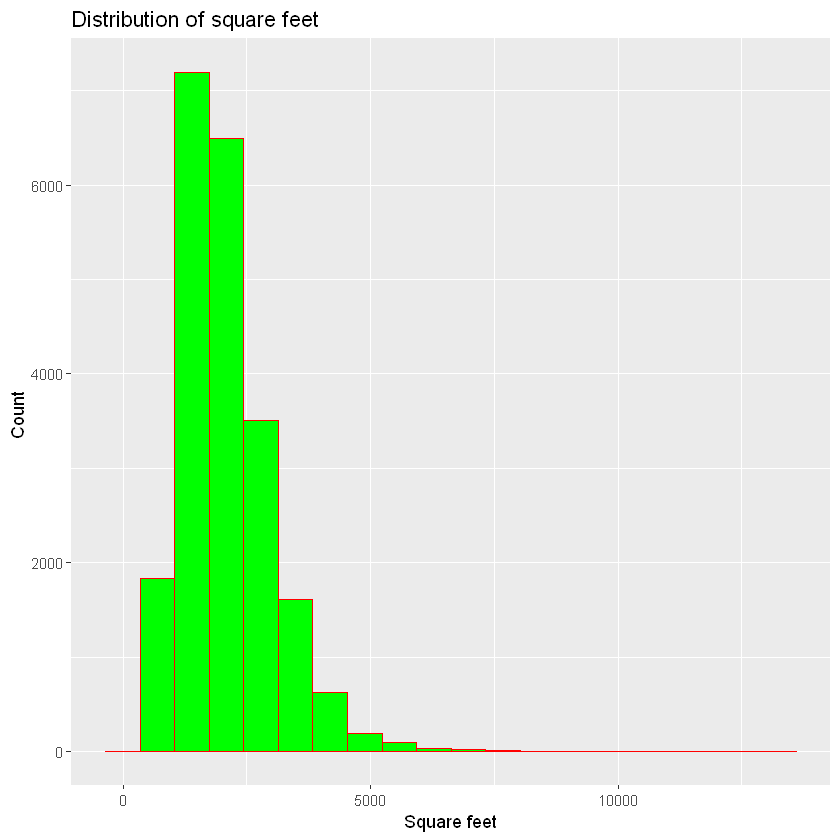

In [50]:

hist_sqft <-
housesales %>% ggplot(aes(x=sqft_living)) +
geom_histogram(color="red", fill="green", , bins=20)+
labs(x="Square feet", y="Count ", title="Distribution of square feet")
hist_sqft


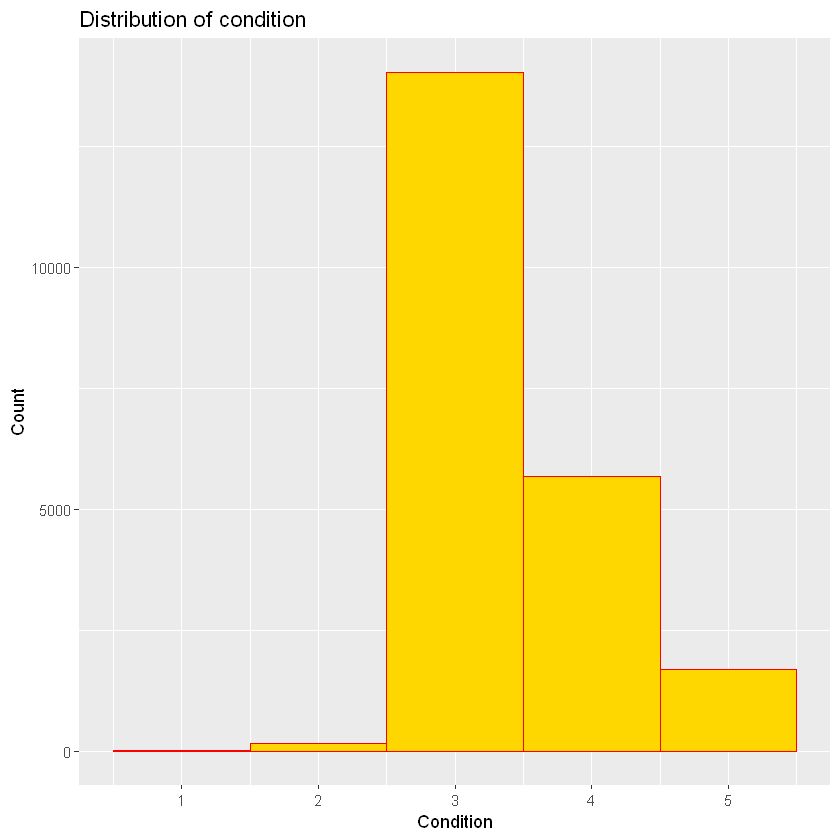

In [51]:

hist_condition  <-
housesales %>% ggplot(aes(x=condition)) +
geom_histogram(color="red", fill="gold", , bins=5)+
labs(x="Condition", y="Count", title="Distribution of condition")
hist_condition 

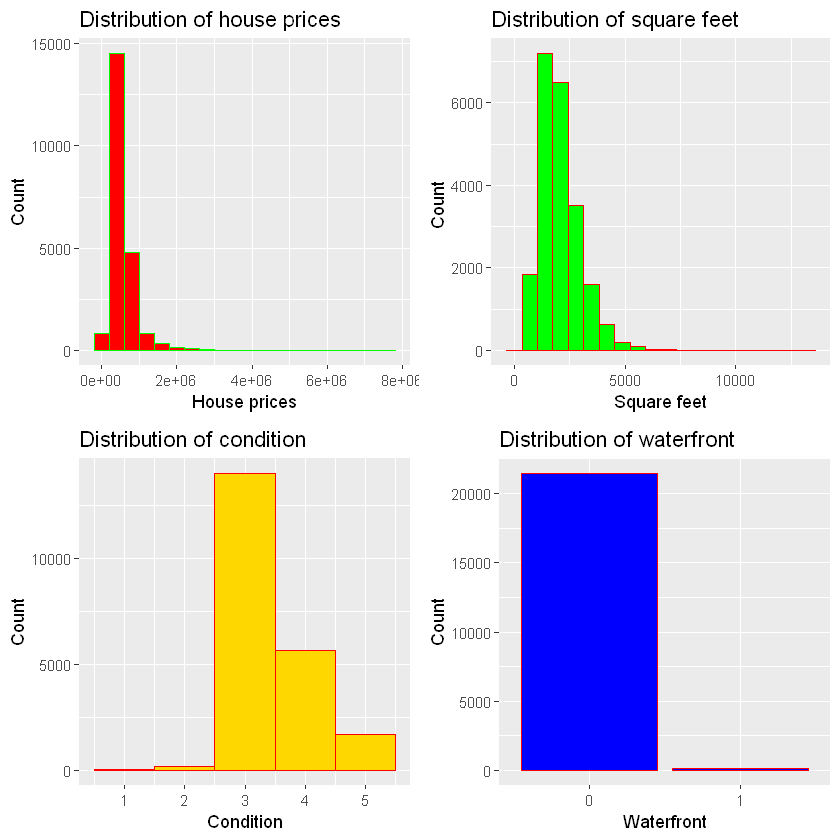

In [52]:

hist_waterfront  <-
housesales %>% ggplot(aes(x=waterfront )) +
geom_bar(color="red", fill="blue")+
labs(x="Waterfront", y="Count", title="Distribution of waterfront")

grid.arrange(hist_price, hist_sqft, hist_condition, hist_waterfront, nrow=2, ncol=2)

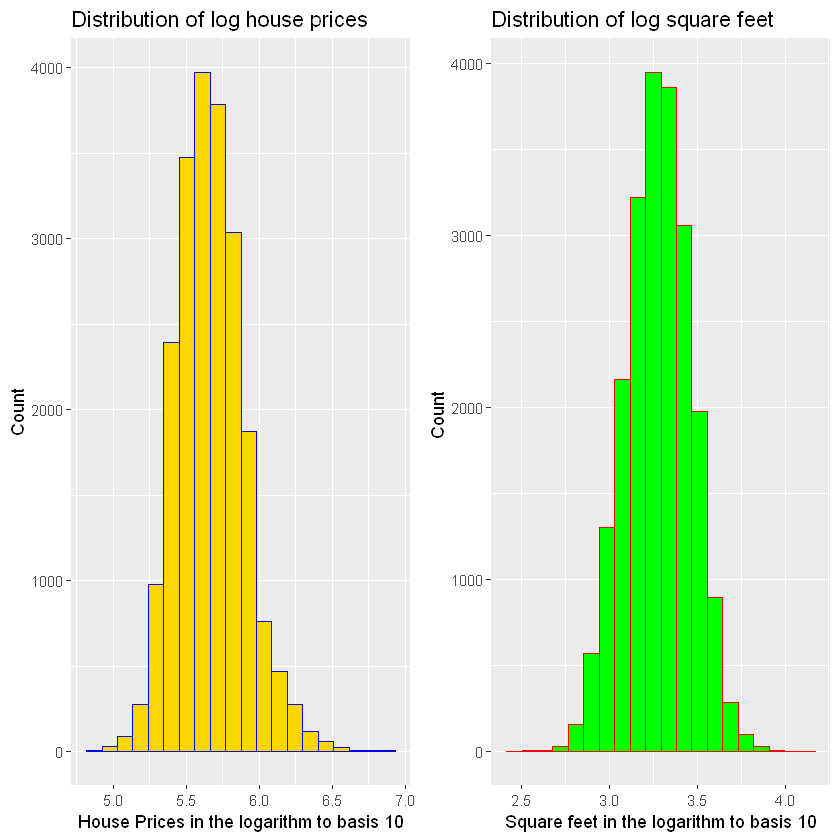

In [53]:


hist_sqft_log <-
housesales %>% ggplot(aes(x=log10_square)) +
geom_histogram(color="red", fill="green", , bins=20)+
labs(x="Square feet in the logarithm to basis 10", y="Count ", title="Distribution of log square feet")


grid.arrange(housesales_log_hist, hist_sqft_log, ncol=2)

# The result of the log transformation is satifying as both distribution are now more normal

In [54]:
# install.packages("scatterplot3d",  repos = c("http://rstudio.org/_packages","http://cran.rstudio.com")) # Install
library("scatterplot3d") # load

Warning message:
"package 'scatterplot3d' was built under R version 3.5.2"

Warning message in scatterplot3d(x = x_3d, y = y_3d, z = z_3d, main = "3D Scatter Plot of the relationship between \nprices, square feet and year built", :
"color is ignored when highlight.3d = TRUE"

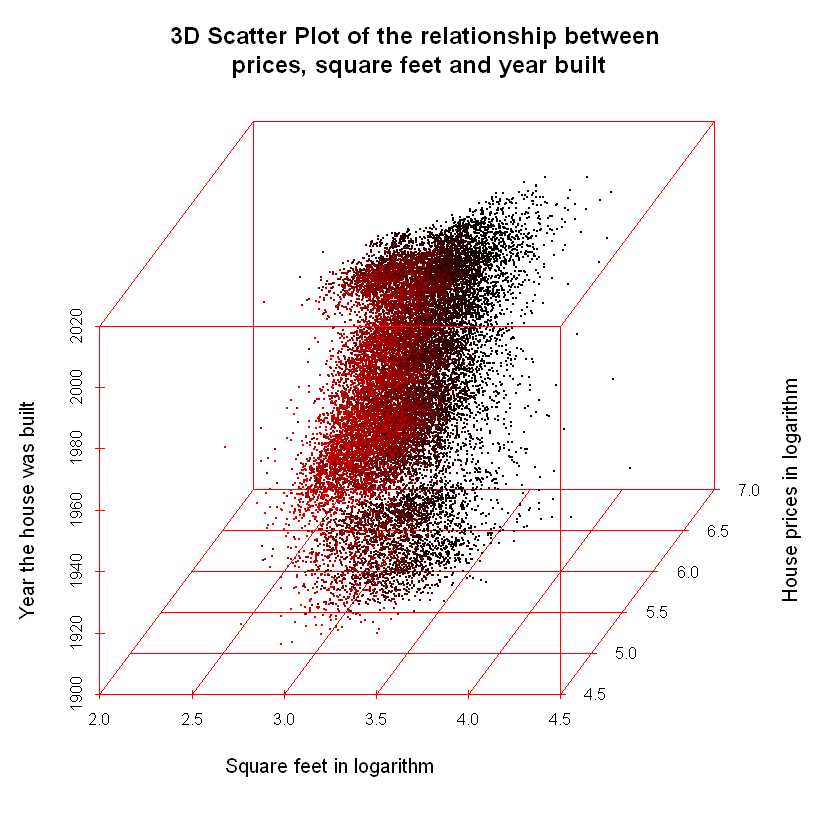

In [55]:
# Regression model predicting house prices with square feet and the year the houses were built

y_3d <- housesales$log10_prices
x_3d <- housesales$log10_square
z_3d <- housesales$yr_built

Scatterplot_3D_price_sf_year <- scatterplot3d(x=x_3d, y=y_3d, z=z_3d, 
              main="3D Scatter Plot of the relationship between \nprices, square feet and year built",
              xlab = "Square feet in logarithm",
              ylab = "House prices in logarithm",
              zlab = "Year the house was built",
              pch = 16, color="steelblue",
              col.grid="red",
              col.axis="red",
              cex.symbols=0.2,
              highlight.3d = TRUE, angle = 60,)



In [56]:
# build a regression model with prices predicted by year built and square feet
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors
# is year built a categorical variable or a numerical variable?

housesales <-
housesales %>% mutate(yr_built_as_factor = factor(yr_built))

reg_model_price_yr_sf <-
lm(log10_prices~log10_square+yr_built , data=housesales_none_33 )


get_regression_table(reg_model_price_yr_sf)
reg_model_price_yr_sf_pred <-
predict(reg_model_price_yr_sf)



# As none houses were built in year 0 the intercept is meaningless
# For every year (unit) the price decreases by -0.001
# For every square feet (unit) the price increases by 0.913




term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.383,0.075,71.394,0,5.235,5.530
log10_square,0.913,0.006,141.100,0,0.901,0.926
yr_built,-0.001,0.000,-33.830,0,-0.001,-0.001


In [57]:
# Model assesment

rmse_reg_model_price_yr_sf <-
rmse(housesales_none_33$log10_prices, reg_model_price_yr_sf_pred)

RSS_reg_model_price_yr_sf  <-
get_regression_points(reg_model_price_yr_sf ) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

R_squared_reg_model_price_yr_sf_extracted <- summary(reg_model_price_yr_sf )$adj.r.squared

TSS_squared_reg_model_price_yr <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)

R_squared_reg_model_price_yr_calculated <- 1- RSS_reg_model_price_yr_sf / TSS_squared_reg_model_price_yr 

paste("rmse: ", RSS_reg_model_price_yr_sf )
paste("R_square_extracted: ", R_squared_reg_model_price_yr_sf_extracted )
paste("R_squared_calculated: ", R_squared_reg_model_price_yr_calculated)
paste("RSS: ", RSS_reg_model_price_yr_sf)


TSS_all <- TSS_squared_reg_model_price_yr

[1] "rmse:  584.686085"

[1] "R_square_extracted:  0.482871160085952"

[1] "R_squared_calculated:  0.482910696541082"

[1] "RSS:  584.686085"

 int [1:21613] 3 3 2 4 3 4 3 3 3 3 ...


[1]  0  1  2  3  4  5  6  7  8  9 10 11 33

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   3.000   3.371   4.000  33.000 

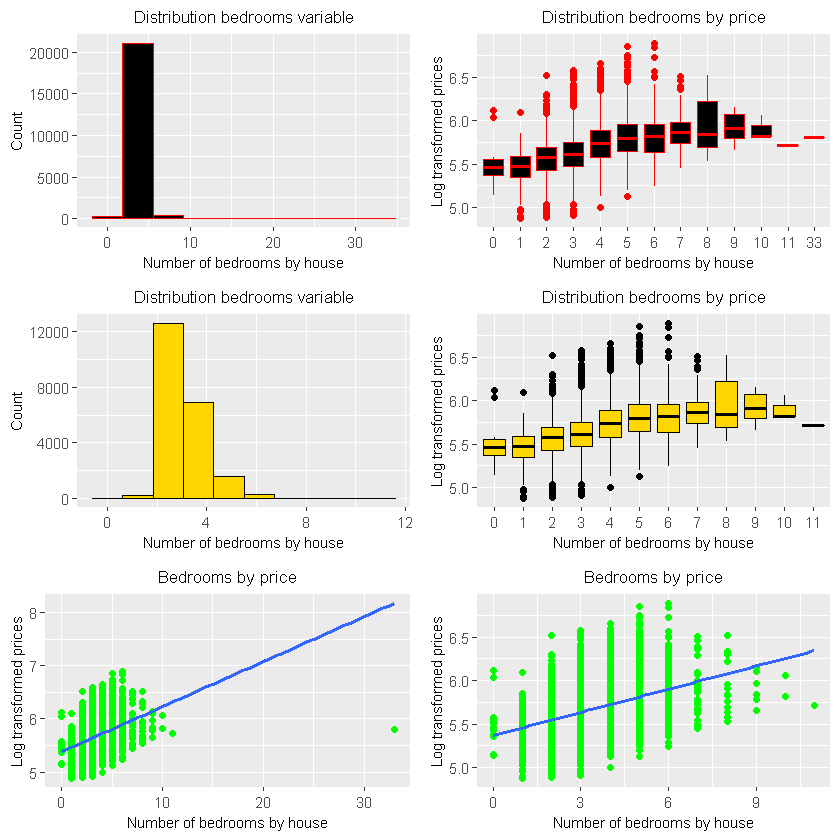

In [58]:
# Adding number of bedrooms

# EDA
str(housesales$bedrooms)
sort(unique(housesales$bedrooms))
summary(housesales$bedrooms)

hs_bed_hist <-
housesales %>% ggplot(aes(x=bedrooms))+ geom_histogram(fill="black", color="red", bins=10) + 
labs(x="Number of bedrooms by house", y="Count", title="Distribution bedrooms variable")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_bed_pr_box <- 
housesales %>% ggplot(aes(x=as.factor(bedrooms), y=log10_prices))+ geom_boxplot(fill="black", color="red") + 
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Distribution bedrooms by price")+ 
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

# A house with 33 bedrooms seems to be an outlier
# Remove from data set

housesales_none_33 <-
housesales %>% filter(bedrooms != 33)

hs_bed_hist_none_33 <-
housesales_none_33  %>% ggplot(aes(x=bedrooms))+ geom_histogram(fill="gold", color="black", bins=10) + 
labs(x="Number of bedrooms by house", y="Count", title="Distribution bedrooms variable")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_bed_pr_box_none_33 <- 
housesales_none_33  %>% ggplot(aes(x=as.factor(bedrooms), y=log10_prices))+ geom_boxplot(fill="gold", color="black") + 
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Distribution bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_point_reg <- 
housesales %>% ggplot(aes(x=bedrooms, y=log10_prices)) + 
geom_point(color="green")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))


hs_point_reg_none_33 <-
housesales_none_33 %>% ggplot(aes(x=bedrooms, y=log10_prices)) + 
geom_point(color="green") +
geom_smooth(method="lm", se=FALSE)+
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))


grid.arrange(hs_bed_hist, hs_bed_pr_box, hs_bed_hist_none_33, hs_bed_pr_box_none_33,
             hs_point_reg, hs_point_reg_none_33, nrow=3,  ncol=2)

# Afer removing the outlier the distribution and scatterplot is far more condensed

In [60]:
# building a regression model with two independent variables: bedrooms+log10_square)
# dummy variables are created by lm only for factor
# convert condition type integer into factors

class (housesales_none_33$bedrooms)
sort(unique(housesales_none_33$bedrooms))
housesales_none_33 <-
housesales_none_33 %>% mutate(bedrooms_as_factors = factor(bedrooms))

names(housesales_none_33)


reg_model_bed_sq <-
lm(log10_prices~bedrooms_as_factors+log10_square,data=housesales_none_33)

get_regression_table(reg_model_bed_sq)


reg_model_bed_sq_pred <- 
predict(reg_model_bed_sq)

head(housesales_none_33)

# some interpretations:
# the increase in log price for every unit in log square feet is 0.968
# the intercept is the baseline for the categorical variable bedrooms
# in this case houses with 0 bedrooms start at 2.498
# the coefficients for every bedroom type coded as dummy variables 
# are the increase in house prices from the intercept as the baseline
# a house with two bedrooms increases the price by 0.089 
# or shifts / offsets the data point by 0.089 on the y-axis from the intercept at 2.498 
# contra intuitively more bedrooms seems not to increase the price every time
# this is also reflected in the regression line belowe


[1] "integer"

[1]  0  1  2  3  4  5  6  7  8  9 10 11

[1] "id"                  "date"                "price"              
 [4] "bedrooms"            "bathrooms"           "sqft_living"        
 [7] "sqft_lot"            "floors"              "waterfront"         
[10] "view"                "condition"           "grade"              
[13] "sqft_above"          "sqft_basement"       "yr_built"           
[16] "yr_renovated"        "zipcode"             "lat"                
[19] "long"                "sqft_living15"       "sqft_lot15"         
[22] "log10_prices"        "yr_built_as_factor"  "log10_square"       
[25] "bedrooms_as_factors"

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,2.498,0.052,47.737,0.000,2.396,2.601
bedrooms_as_factors1,0.135,0.047,2.846,0.004,0.042,0.228
bedrooms_as_factors2,0.089,0.046,1.935,0.053,-0.001,0.179
bedrooms_as_factors3,-0.012,0.046,-0.254,0.800,-0.102,0.078
bedrooms_as_factors4,-0.036,0.046,-0.772,0.440,-0.126,0.055
bedrooms_as_factors5,-0.035,0.046,-0.750,0.453,-0.125,0.056
bedrooms_as_factors6,-0.057,0.047,-1.214,0.225,-0.149,0.035
bedrooms_as_factors7,-0.065,0.053,-1.214,0.225,-0.169,0.040
bedrooms_as_factors8,-0.014,0.065,-0.212,0.832,-0.141,0.114
bedrooms_as_factors9,-0.041,0.082,-0.505,0.614,-0.201,0.119


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log10_prices,yr_built_as_factor,log10_square,bedrooms_as_factors
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,0,98178,47.5112,-122.257,1340,5650,5.346157,1955,3.071882,3
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,1991,98125,47.7210,-122.319,1690,7639,5.730782,1951,3.409933,3
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,0,98028,47.7379,-122.233,2720,8062,5.255273,1933,2.886491,2
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,0,98136,47.5208,-122.393,1360,5000,5.781037,1965,3.292256,4
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,0,98074,47.6168,-122.045,1800,7503,5.707570,1987,3.225309,3
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,0,98053,47.6561,-122.005,4760,101930,6.088136,2001,3.733999,4


In [61]:
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors

names(housesales_none_33)

reg_model_bed_pr <- 
lm(log10_prices~bedrooms_as_factors,data=housesales_none_33)

reg_model_bed_pr_table <-
get_regression_table(reg_model_bed_pr )
reg_model_bed_pr_pred <- 
predict(reg_model_bed_pr)


get_regression_table(reg_model_bed_pr )
head(get_regression_points(reg_model_bed_pr ))


[1] "id"                  "date"                "price"              
 [4] "bedrooms"            "bathrooms"           "sqft_living"        
 [7] "sqft_lot"            "floors"              "waterfront"         
[10] "view"                "condition"           "grade"              
[13] "sqft_above"          "sqft_basement"       "yr_built"           
[16] "yr_renovated"        "zipcode"             "lat"                
[19] "long"                "sqft_living15"       "sqft_lot15"         
[22] "log10_prices"        "yr_built_as_factor"  "log10_square"       
[25] "bedrooms_as_factors"

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.508,0.059,93.146,0.000,5.392,5.624
bedrooms_as_factors1,-0.052,0.061,-0.853,0.393,-0.172,0.068
bedrooms_as_factors2,0.050,0.059,0.849,0.396,-0.066,0.167
bedrooms_as_factors3,0.110,0.059,1.859,0.063,-0.006,0.226
bedrooms_as_factors4,0.234,0.059,3.955,0.000,0.118,0.350
bedrooms_as_factors5,0.307,0.059,5.163,0.000,0.190,0.423
bedrooms_as_factors6,0.313,0.061,5.171,0.000,0.194,0.432
bedrooms_as_factors7,0.375,0.069,5.476,0.000,0.241,0.509
bedrooms_as_factors8,0.422,0.084,5.040,0.000,0.258,0.585
bedrooms_as_factors9,0.408,0.105,3.880,0.000,0.202,0.615


ID,log10_prices,bedrooms_as_factors,log10_prices_hat,residual
1,5.346,3,5.618,-0.272
2,5.731,3,5.618,0.112
3,5.255,2,5.559,-0.303
4,5.781,4,5.742,0.039
5,5.708,3,5.618,0.089
6,6.088,4,5.742,0.346


In [62]:
# building a regression model with two independent variables: bedrooms+log10_square)
# dummy variables are created by lm only for factor
# convert condition type integer into factors

class (housesales_none_33$bedrooms)
sort(unique(housesales_none_33$bedrooms))
housesales_none_33 <-
housesales_none_33 %>% mutate(bedrooms_as_factors = factor(bedrooms))

names(housesales_none_33)


reg_model_bed_sq <-
lm(log10_prices~bedrooms_as_factors+log10_square,data=housesales_none_33)

get_regression_table(reg_model_bed_sq)


reg_model_bed_sq_pred <- 
predict(reg_model_bed_sq)

head(housesales_none_33)

# some interpretations:
# the increase in log price for every unit in log square feet is 0.968
# the intercept is the baseline for the categorical variable bedrooms
# in this case houses with 0 bedrooms start at 2.498
# the coefficients for every bedroom type coded as dummy variables 
# are the increase in house prices from the intercept as the baseline
# a house with two bedrooms increases the price by 0.089 
# or shifts / offsets the data point by 0.089 on the y-axis from the intercept at 2.498 
# contra intuitively more bedrooms seems not to increase the price every time
# this is also reflected in the regression line belowe


[1] "integer"

[1]  0  1  2  3  4  5  6  7  8  9 10 11

[1] "id"                  "date"                "price"              
 [4] "bedrooms"            "bathrooms"           "sqft_living"        
 [7] "sqft_lot"            "floors"              "waterfront"         
[10] "view"                "condition"           "grade"              
[13] "sqft_above"          "sqft_basement"       "yr_built"           
[16] "yr_renovated"        "zipcode"             "lat"                
[19] "long"                "sqft_living15"       "sqft_lot15"         
[22] "log10_prices"        "yr_built_as_factor"  "log10_square"       
[25] "bedrooms_as_factors"

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,2.498,0.052,47.737,0.000,2.396,2.601
bedrooms_as_factors1,0.135,0.047,2.846,0.004,0.042,0.228
bedrooms_as_factors2,0.089,0.046,1.935,0.053,-0.001,0.179
bedrooms_as_factors3,-0.012,0.046,-0.254,0.800,-0.102,0.078
bedrooms_as_factors4,-0.036,0.046,-0.772,0.440,-0.126,0.055
bedrooms_as_factors5,-0.035,0.046,-0.750,0.453,-0.125,0.056
bedrooms_as_factors6,-0.057,0.047,-1.214,0.225,-0.149,0.035
bedrooms_as_factors7,-0.065,0.053,-1.214,0.225,-0.169,0.040
bedrooms_as_factors8,-0.014,0.065,-0.212,0.832,-0.141,0.114
bedrooms_as_factors9,-0.041,0.082,-0.505,0.614,-0.201,0.119


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log10_prices,yr_built_as_factor,log10_square,bedrooms_as_factors
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,0,98178,47.5112,-122.257,1340,5650,5.346157,1955,3.071882,3
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,1991,98125,47.7210,-122.319,1690,7639,5.730782,1951,3.409933,3
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,0,98028,47.7379,-122.233,2720,8062,5.255273,1933,2.886491,2
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,0,98136,47.5208,-122.393,1360,5000,5.781037,1965,3.292256,4
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,0,98074,47.6168,-122.045,1800,7503,5.707570,1987,3.225309,3
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,0,98053,47.6561,-122.005,4760,101930,6.088136,2001,3.733999,4


In [63]:


# Make a prediction for only one data point by two independent variables

df_new_data <-
data.frame(bedrooms_as_factors=factor(1), log10_square = 3.071882)

df_new_data


pred_df_new_data <-
predict(reg_model_bed_sq , newdata = df_new_data )


paste("Predict the log price of a house with one bedroom and a log10_square of 3.071882: ", 
      round(pred_df_new_data, 2), "or $", round(10^pred_df_new_data, 2)  )

pred_df_new_data_manual <-
2.693  + 1*-0.033 + 0.941 * 3.071882

paste("Predict manually calculated: ", pred_df_new_data_manual )


bedrooms_as_factors,log10_square
1,3.071882


[1] "Predict the log price of a house with one bedroom and a log10_square of 3.071882:  5.61 or $ 405710.48"

[1] "Predict manually calculated:  5.550640962"

In [64]:



# Model assesment

RSS_reg_model_bed_sq <-
get_regression_points(reg_model_bed_sq ) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", RSS_reg_model_bed_sq)

# rmse
paste("rmse: ", rmse(housesales_none_33$log10_prices, reg_model_bed_sq_pred ))

# R-squared = Explained variation / Total variation
# R-squared is always between 0 and 100%:
# 0% indicates that the model explains none of the variability of the response data around its mean.
# 100% indicates that the model explains all the variability of the response data around its mean.
# summary(eruption.lm)$r.squared


R_squared_reg_model_bed_sq <- 
1- (RSS_reg_model_bed_sq / TSS_all)

paste("R-squared_extracted: ", summary(reg_model_bed_sq)$adj.r.squared)
paste("R-squared_calculated: ", R_squared_reg_model_bed_sq)


# R-squared: 0.465
# the model explains some of of the variability of the response data around its mean.
# Improvement compared with only bedrooms



[1] "RSS:  591.102932"

[1] "rmse:  0.1653784333785"

[1] "R-squared_extracted:  0.476957811079631"

[1] "R-squared_calculated:  0.477235714647794"

In [65]:
# Model assesment


reg_model_bed_pr_RSS <-
get_regression_points(reg_model_bed_pr) %>% mutate(RS=residual^2) %>% summarize(RSS= sum(RS))


reg_model_bed_pr_rmse <-
rmse(housesales_none_33$log10_prices, reg_model_bed_pr_pred)

reg_model_bed_pr_R_squared <- 
1- (reg_model_bed_pr_RSS / TSS_all)

paste("R-squared extracted", summary(reg_model_bed_pr)$adj.r.squared)
paste("R-squared: ", reg_model_bed_pr_R_squared )
paste("RSS: ", reg_model_bed_pr_RSS)
paste("rmse: ", reg_model_bed_pr_rmse)



[1] "R-squared extracted 0.131083743167414"

[1] "R-squared:  0.131552686284045"

[1] "RSS:  981.975563"

[1] "rmse:  0.213161873116286"

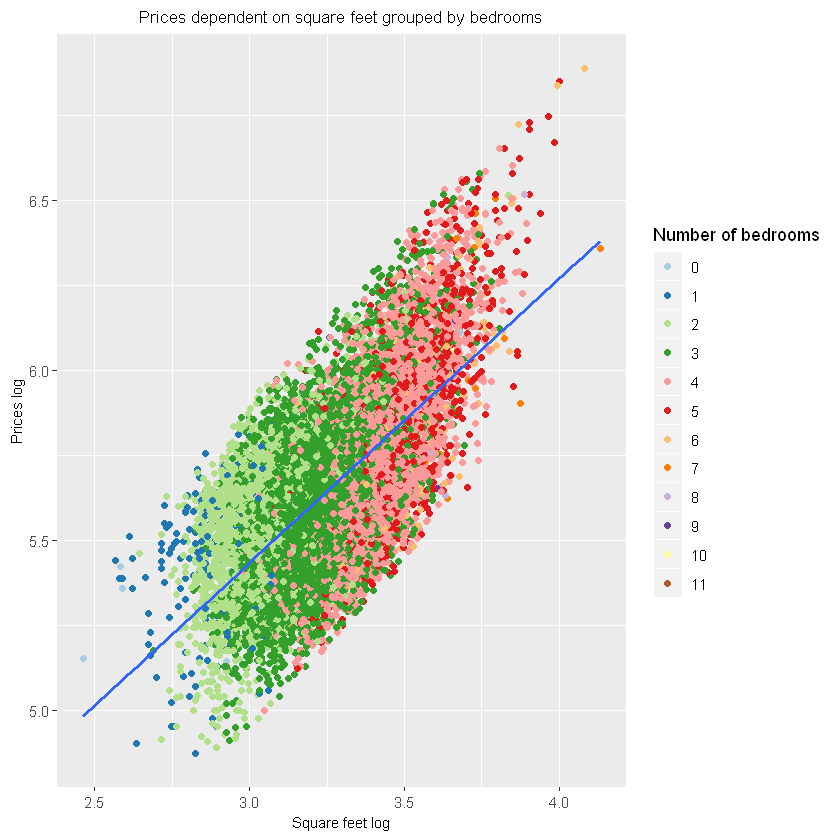

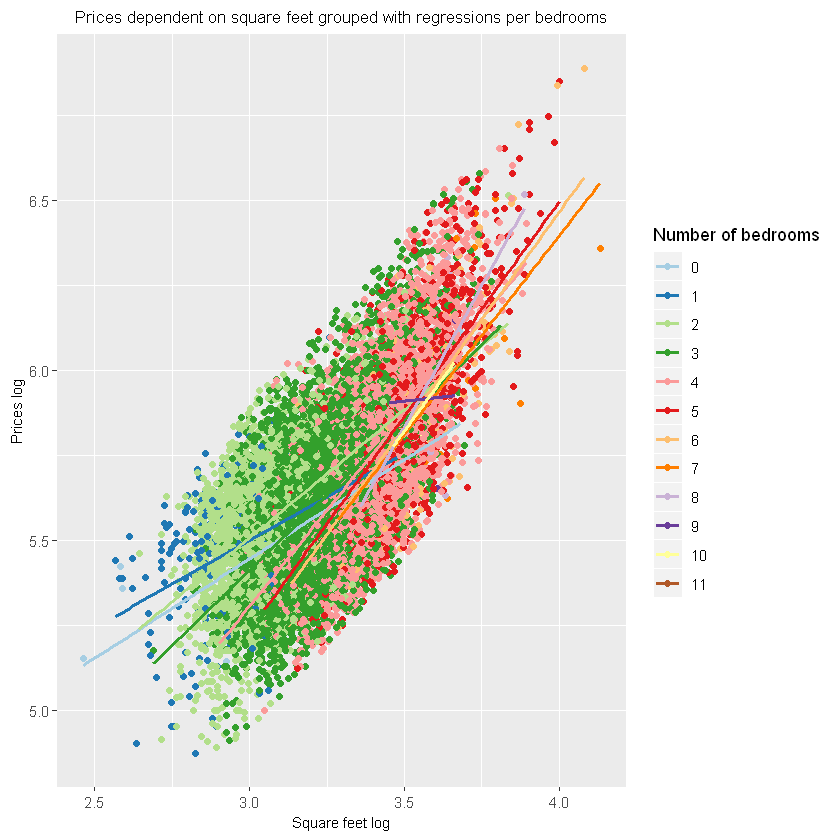

In [66]:
# investigate the relationship between sf and price
plot_pr_sqf_col_points <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices)) +
geom_point(aes(color=factor(bedrooms)))+
geom_smooth(method="lm", se=FALSE)+
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped by bedrooms")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

# investigate the relationship between sf and price seperately for each number of bedrooms
plot_pr_sqf_col_group <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) +
geom_point()+ 
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped with regressions per bedrooms")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")


# Regression with paralell slopes but different intercepts

df_3333 <- cbind(housesales_none_33, pred=predict(reg_model_bed_sq))

plot_pr_sqf_col_group_paralell_slopes <-
ggplot(data=df_3333 , mapping=aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts from bedroom type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")



# reduce number of bedrooms to 5
plot_pr_sqf_col_group_bed_5 <-
housesales_none_33 %>% filter(bedrooms<=5) %>% 
ggplot(aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) +
geom_point()+ 
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Number of bedrooms reduced to 5")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")


plot(plot_pr_sqf_col_points)
plot(plot_pr_sqf_col_group)



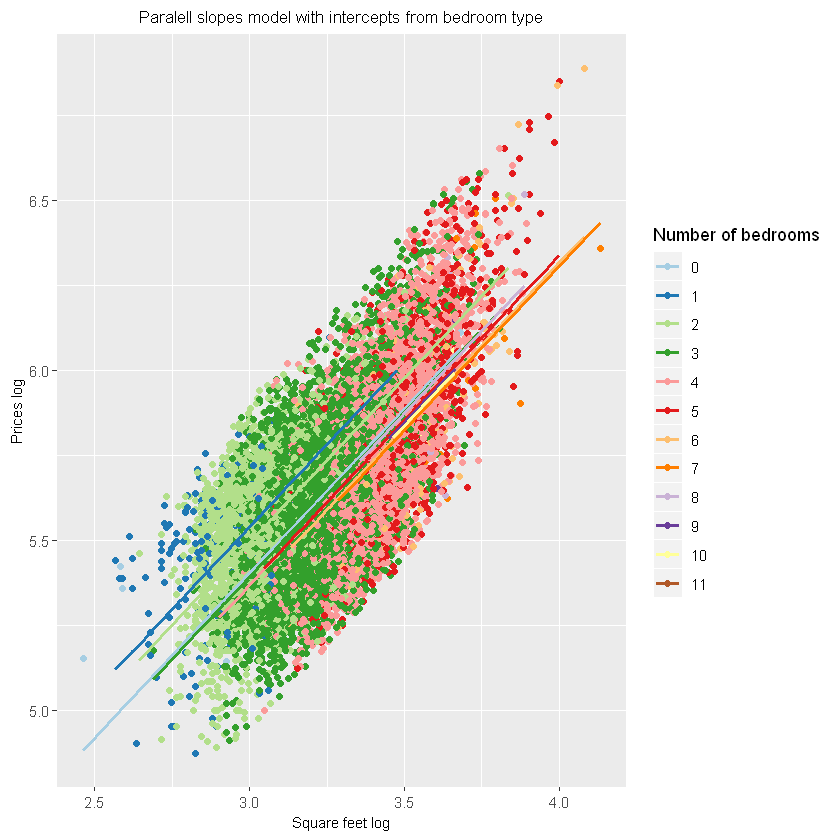

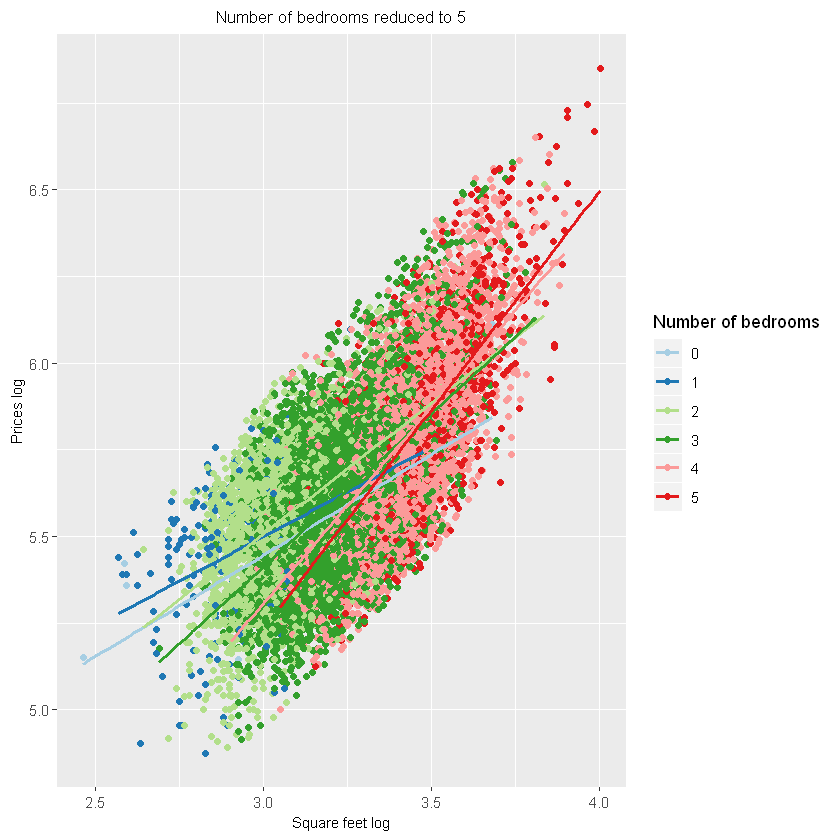

In [67]:
plot(plot_pr_sqf_col_group_paralell_slopes)
plot(plot_pr_sqf_col_group_bed_5)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


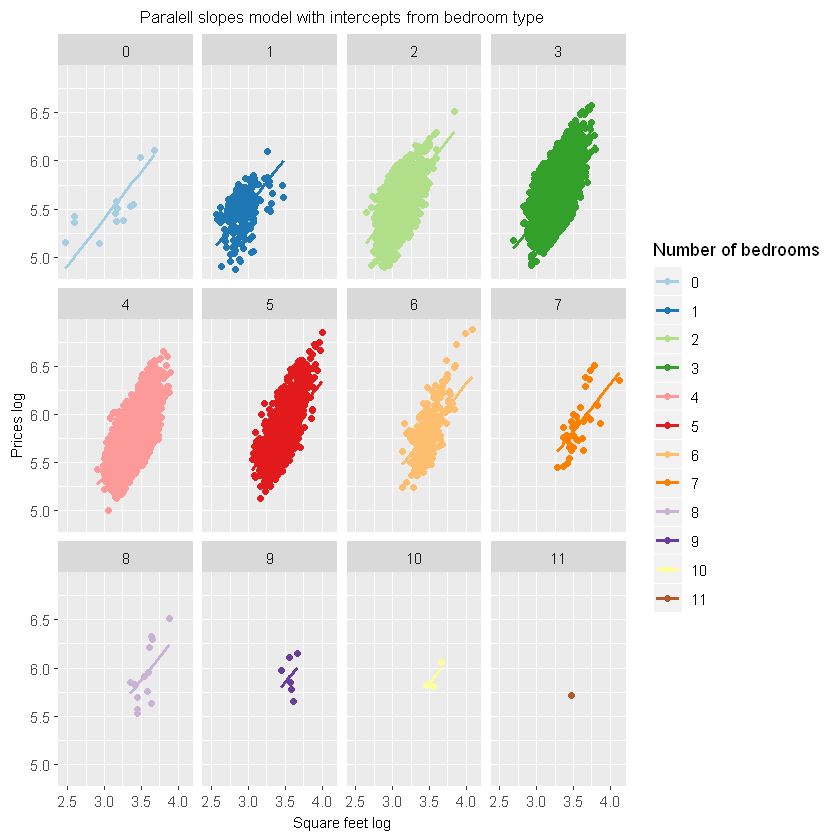

In [68]:
plot_pr_sqf_col_group_paralell_slopes +
facet_wrap(.~bedrooms)

 int [1:21612] 3 3 3 5 3 3 3 3 3 3 ...


[1] 3 5 4 1 2

[1] "integer"

[1] 21612

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.409   4.000   5.000 

[1]  0  1  2  3  4  5  6  7  8  9 10 11

condition,Counts_of_condition,mean_log_prices,sd_log_prices
1,30,5.424848,0.2929704
2,172,5.445228,0.2334550
3,14031,5.670316,0.2243437
4,5679,5.651023,0.2284421
5,1700,5.714485,0.2436024


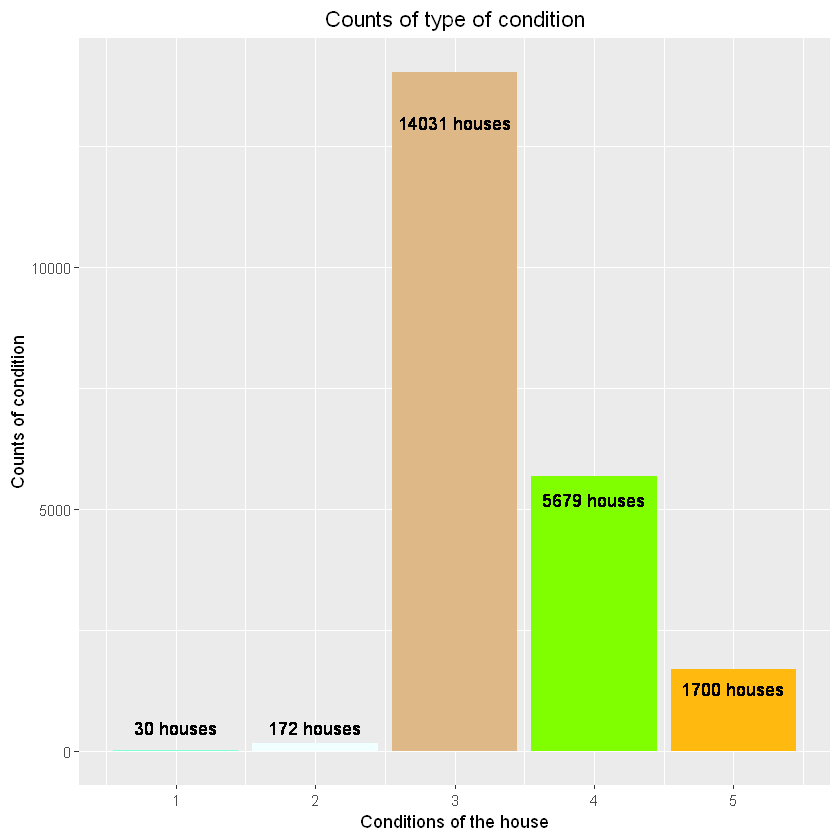

In [69]:
# building a model predicting house prices with the predictors square feet and condition

glimpse(housesales_none_33$condition)
unique(housesales_none_33$condition)
class(housesales_none_33$condition)
length(housesales_none_33$condition)
summary(housesales_none_33$condition)
sort(unique(housesales_none_33$bedrooms))



# bar plot of house condition

ggplot(housesales_none_33, aes(x=condition))+
geom_bar(fill=c("#7FFFD4", "#F0FFFF", "#DEB887", "#7FFF00", "#FFB90F"))+
labs(y="Counts of condition", x="Conditions of the house", title="Counts of type of condition")+
theme(plot.title=element_text(hjust=0.5))+
geom_text(y=13000, x=3, label="14031 houses")+
geom_text(y=500, x=1, label="30 houses")+
geom_text(y=500, x=2, label="172 houses")+
geom_text(y=5200, x=4, label="5679 houses")+
geom_text(y=1300, x=5, label="1700 houses")

# Conclusion: the group of houses in condition 3 is the largest

housesales_none_33 %>% 
group_by(condition) %>%
summarize(Counts_of_condition = n(), 
          mean_log_prices = mean(log10_prices), sd_log_prices = sd(log10_prices))


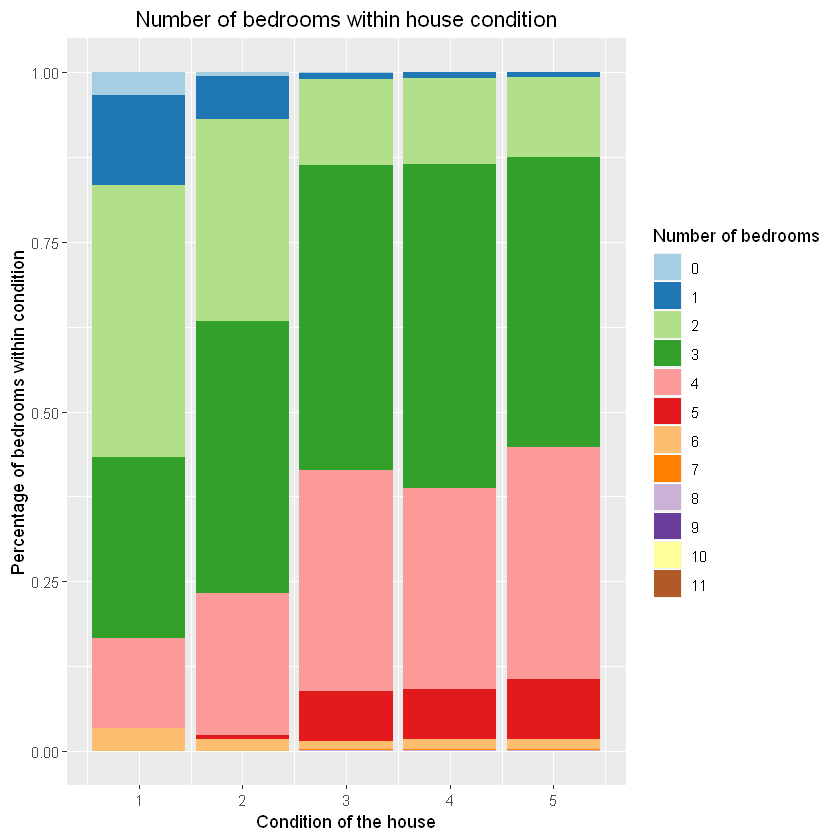

In [70]:

ggplot(housesales_none_33, aes(x=condition,fill=factor(bedrooms)))+
geom_bar(position = "fill")+
scale_fill_brewer( palette = "Paired")+
labs(y="Percentage of bedrooms within condition", x="Condition of the house", 
     title="Number of bedrooms within house condition")+
theme(plot.title=element_text(hjust=0.5))+
guides(fill = guide_legend(title = "Number of bedrooms", title.position = "top"))

# Conclusion: in every condition the largest group are houses with 3 bedrooms, followed by 4 bedrooms
# 0 and 1 bedroom are less represented

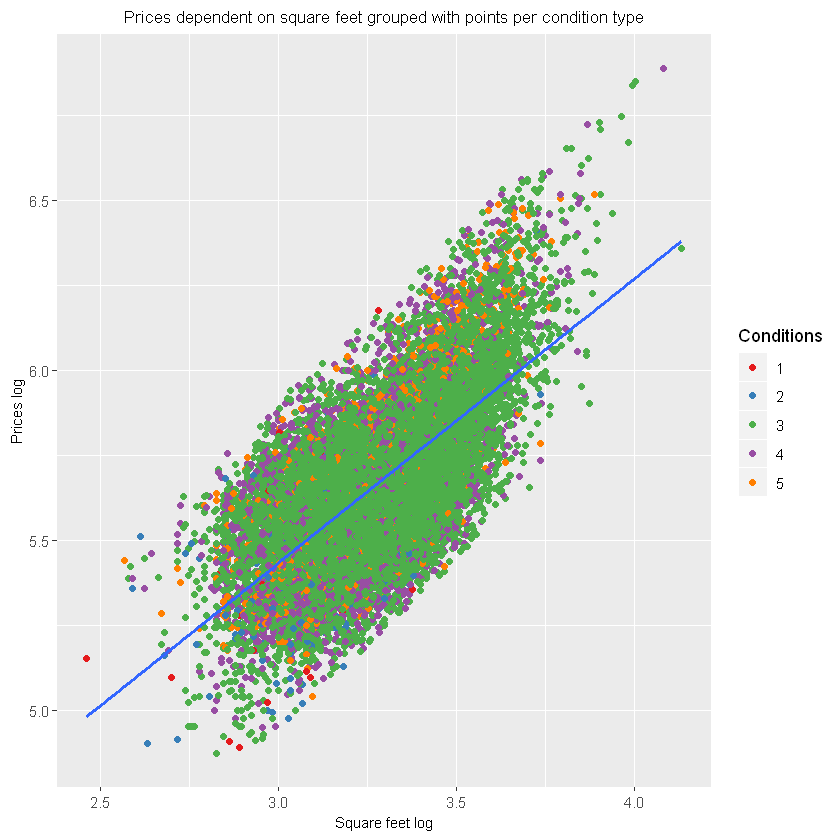

In [71]:
plot_hs_n33_pr_sf_cond_one_reg <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices)) +
geom_point(aes(color=factor(condition)))+
geom_smooth(method="lm", se=FALSE)+ 
scale_color_brewer(palette = "Set1", name= "Conditions") +
labs(x="Square feet log", y="Prices log", 
     title="Prices dependent on square feet grouped with points per condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_hs_n33_pr_sf_cond_one_reg )

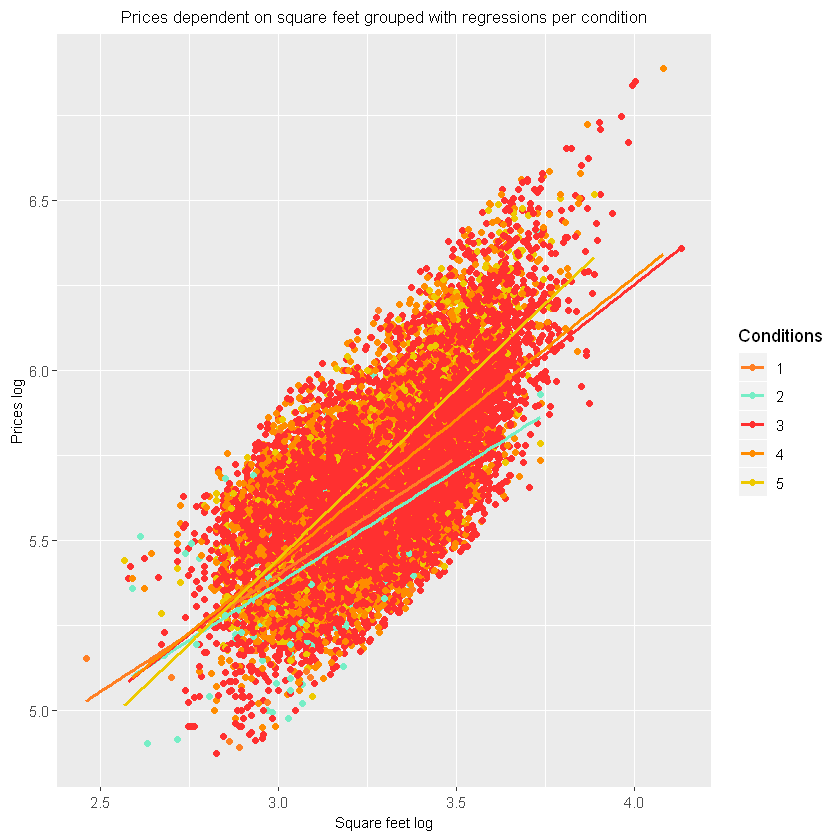

In [72]:
# investigate the relationship between sf and price seperately for each number of bedrooms


colors_1212 <- c("#FF7F24", "#76EEC6", "#FF3030", "#FF8C00", "#EEC900")

plot_pr_sqf_cond <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices, color=factor(condition))) +
geom_point()+ 
scale_color_manual( values= c(colors_1212), name= "Conditions")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped with regressions per condition")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_pr_sqf_cond)

In [73]:
# dummy variables are created by lm only for factor
# convert condition type integer into factors

condition_as_factor <-  factor(housesales_none_33$condition)

reg_model_pr_sqf_cond <-
lm(log10_prices ~ log10_square + condition_as_factor,  data= housesales_none_33)

reg_model_pr_sqf_cond_table <-
get_regression_table(reg_model_pr_sqf_cond )

reg_model_pr_sqf_cond_points <-
get_regression_points(reg_model_pr_sqf_cond)

summary(reg_model_pr_sqf_cond )

reg_model_pr_sqf_cond_table

head(reg_model_pr_sqf_cond_points)




Call:
lm(formula = log10_prices ~ log10_square + condition_as_factor, 
    data = housesales_none_33)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52891 -0.12700  0.00635  0.11098  0.58481 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.881651   0.036024  79.992   <2e-16 ***
log10_square          0.837297   0.006241 134.170   <2e-16 ***
condition_as_factor2 -0.038525   0.033201  -1.160    0.246    
condition_as_factor3  0.031855   0.030708   1.037    0.300    
condition_as_factor4  0.043704   0.030745   1.421    0.155    
condition_as_factor5  0.095619   0.030937   3.091    0.002 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1678 on 21606 degrees of freedom
Multiple R-squared:  0.462,	Adjusted R-squared:  0.4619 
F-statistic:  3711 on 5 and 21606 DF,  p-value: < 2.2e-16


term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,2.882,0.036,79.992,0.000,2.811,2.952
log10_square,0.837,0.006,134.170,0.000,0.825,0.850
condition_as_factor2,-0.039,0.033,-1.160,0.246,-0.104,0.027
condition_as_factor3,0.032,0.031,1.037,0.300,-0.028,0.092
condition_as_factor4,0.044,0.031,1.421,0.155,-0.017,0.104
condition_as_factor5,0.096,0.031,3.091,0.002,0.035,0.156


ID,log10_prices,log10_square,condition_as_factor,log10_prices_hat,residual
1,5.346,3.072,3,5.486,-0.139
2,5.731,3.410,3,5.769,-0.038
3,5.255,2.886,3,5.330,-0.075
4,5.781,3.292,5,5.734,0.047
5,5.708,3.225,3,5.614,0.094
6,6.088,3.734,3,6.040,0.048


In [74]:
head(reg_model_pr_sqf_cond_points)


# Model assesment

# RSS
RSS_reg_model_pr_sqf_cond_points <-
reg_model_pr_sqf_cond_points %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))


# rmse
reg_model_pr_sqf_cond_pred <-
predict(reg_model_pr_sqf_cond )


# RS-squared

TSS_reg_model_pr_sqf_cond <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)


R_squared_cond_manually <- 1-RSS_reg_model_pr_sqf_cond_points / TSS_reg_model_pr_sqf_cond

# Display
paste("rmse: ", rmse(housesales_none_33$price, reg_model_pr_sqf_cond_pred ))
paste("RSS: ", RSS_reg_model_pr_sqf_cond_points)
paste("R-squared extracted: ", summary(reg_model_pr_sqf_cond )$adj.r.squared)
paste("R-squared qualculated with formula: ", R_squared_cond_manually )


# Neither RSS nor rmse speaks for a good model quality


ID,log10_prices,log10_square,condition_as_factor,log10_prices_hat,residual
1,5.346,3.072,3,5.486,-0.139
2,5.731,3.410,3,5.769,-0.038
3,5.255,2.886,3,5.330,-0.075
4,5.781,3.292,5,5.734,0.047
5,5.708,3.225,3,5.614,0.094
6,6.088,3.734,3,6.040,0.048


[1] "rmse:  653043.591709708"

[1] "RSS:  608.281798"

[1] "R-squared extracted:  0.461923653707745"

[1] "R-squared qualculated with formula:  0.462042933286914"

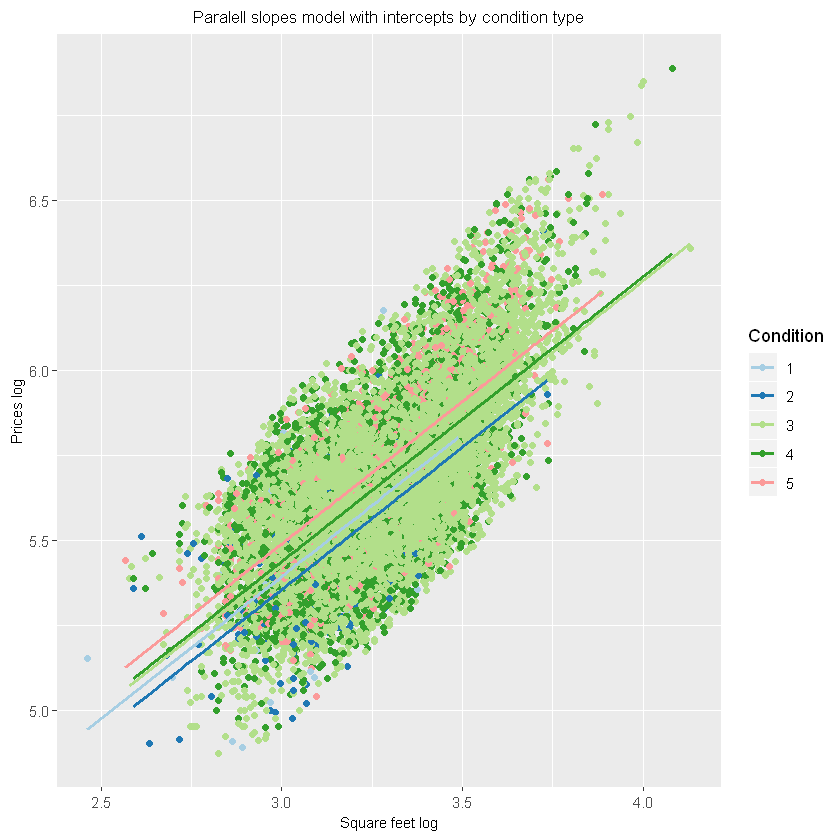

In [75]:
# Regression with paralell slopes but different intercepts

df_4444 <- cbind(housesales_none_33, pred=predict(reg_model_pr_sqf_cond ))

plot_pr_sqf_cond_paralell_slopes <-
ggplot(data=df_4444 , mapping=aes(x=log10_square, y=log10_prices, color=factor(condition))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Condition")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts by condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_pr_sqf_cond_paralell_slopes)

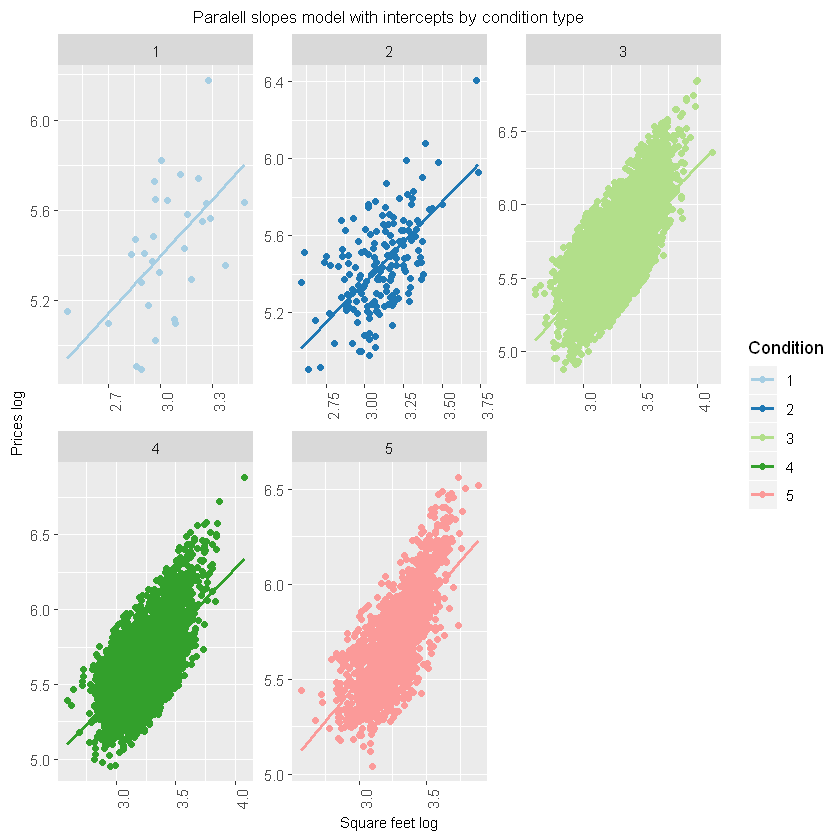

In [76]:
plot_pr_sqf_cond_paralell_slopes_wrap <-
ggplot(data=df_4444 , mapping=aes(x=log10_square, y=log10_prices, color=factor(condition))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Condition")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts by condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right", axis.text.x = element_text(angle=90, hjust=1))+
facet_wrap(.~condition, scales = "free")

plot(plot_pr_sqf_cond_paralell_slopes_wrap)

In [77]:
glimpse(housesales_none_33)
reg_model_housesales_none_33_all <- 
lm(log10_prices ~ ., data=housesales_none_33)



Observations: 21,612
Variables: 25
$ id                  <dbl> 7129300520, 6414100192, 5631500400, 2487200875,...
$ date                <fct> 20141013T000000, 20141209T000000, 20150225T0000...
$ price               <dbl> 221900, 538000, 180000, 604000, 510000, 1225000...
$ bedrooms            <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4,...
$ bathrooms           <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50,...
$ sqft_living         <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, ...
$ sqft_lot            <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 97...
$ floors              <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2....
$ waterfront          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view                <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,...
$ condition           <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,...
$ grade               <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9...
$ sqft_above     

In [78]:
get_regression_table(reg_model_housesales_none_33_all)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,-5.655,1.114,-5.078,0.000,-7.838,-3.472
id,0.000,0.000,2.362,0.018,0.000,0.000
date20140503T000000,0.079,0.036,2.187,0.029,0.008,0.151
date20140504T000000,0.003,0.033,0.090,0.928,-0.061,0.067
date20140505T000000,0.017,0.012,1.470,0.142,-0.006,0.040
date20140506T000000,-0.004,0.012,-0.342,0.732,-0.027,0.019
date20140507T000000,-0.004,0.011,-0.341,0.733,-0.026,0.018
date20140508T000000,-0.002,0.012,-0.164,0.870,-0.025,0.021
date20140509T000000,-0.009,0.012,-0.736,0.462,-0.031,0.014
date20140510T000000,0.017,0.033,0.508,0.611,-0.047,0.081


#### Model selection base on RSS

In [79]:
# There are four models predicting houseprice
# The dataset is housesales_none_33
# The independent numerical variable is always square feet
# The categorical variables are changing with every model.
# These are: water front, bedrooms, condition, year
# And the models are reg_model_pr_sqf_cond, reg_model_bed_sq, reg_model_bed_sq


paste("RSS_bedrooms: ",RSS_reg_model_bed_sq )
paste("RSS_condition: ",RSS_reg_model_pr_sqf_cond_points)
paste("RSS_year: ", RSS_reg_model_price_yr_sf)
# Reasoning:
# RSS is based on the residuals or the distance between observed and predicted y-values
# If the distance is 0 the prediction is perfect

# Conclusion:
# The RSS of the year model has the smallest distance to 0
# Therefore this model has got the best prediction quality
# RSS is best used to judge the model quality between different models and not the quality of a stand alone model

# Now adding a model with one numerical variable and one categorical variable



[1] "RSS_bedrooms:  591.102932"

[1] "RSS_condition:  608.281798"

[1] "RSS_year:  584.686085"

#### Model selection base on R-squared

In [80]:
# R-squared is the variance explained by the model of the total variance
# An r-squared close or equal to one is perfect
# In this case explained variance is equal to total variance


paste("R-square Waterfront: ", reg_model_sf_water_R_squared)
paste("R-square Bedrooms: ", R_squared_reg_model_bed_sq )
paste("R-square Condition: ", R_squared_cond_manually )
paste("R-squared Year: ", R_squared_reg_model_price_yr_calculated)

# Conclusion:
# The RSS of the year model has the highest R-squared
# TSS and RSS are more close to each other
# Therefore this model has got the best prediction quality#
# This is coherent with model selection by RSS
# This is not always the case


[1] "R-square Waterfront:  0.470295104676124"

[1] "R-square Bedrooms:  0.477235714647794"

[1] "R-square Condition:  0.462042933286914"

[1] "R-squared Year:  0.482910696541082"

In [81]:
# Using the functions coded to do the model assesment
# data= housesales_none_33

housesales_log10_reg_models <-
list(reg_model_price_yr_sf, simple_linear_regression_logprice_waterfront, 
     reg_model_sf_water, reg_model_bed_pr, reg_model_pr_sqf_cond, reg_model_housesales_none_33_all )


housesales_log10_reg_models_names <- 
list("reg_model_price_yr_sf", "simple_linear_regression_logprice_waterfront", 
     "reg_model_sf_water", "reg_model_bed_pr", "reg_model_pr_sqf_cond", "reg_model_housesales_none_33_all" )



In [82]:

# Writing a function calculating the R-squared over all models
# R2 is a measure of model fit

R_squared_calc_over_many_models <- 
function(regression_models, R_squared_reg_model_names, dependent_variable){
    
    R_squared_vector <- c()
    R_squared_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
    
    RSS <- get_regression_points(regression_models[[i]])  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    
    RSS <- as.numeric(RSS)
    
    # Total sum of square
    
    Deviation_Mean <- (dependent_variable - mean(dependent_variable))^2
    TSS <- sum(Deviation_Mean)
    
    R_squared <- 1- RSS / TSS
    
    R_squared_vector[i] <- R_squared
    R_squared_names_vector[i] <- R_squared_reg_model_names[[i]]
    
    }
    
    mapped <- mapply(c, R_squared_names_vector, R_squared_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = TRUE)]
    return(mapped)
    
}




# The model "reg_model_all_pred_var" has the highest r-squared with 0.163765841959724
# This supports the conclusion with the RSS
# However the R-squared is not very good.
# Transforming the variable can result in better predictions.



In [83]:
# Writing a function calculating the rmse over all models
# rmse is a commonly used measure of preditive error.
# rmse can be thought of as the 'typical' error a predicive model will make.

rmse_calc_over_many_models <- 
function(regression_models, rmse_reg_model_names, response_variable){
    
    rmse_vector <- c()
    rmse_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
        
        rmse_vector[i] <- rmse(response_variable, predict(regression_models[[i]]))
        rmse_names_vector[i] <- rmse_reg_model_names[[i]]
        
    
    
    }
    
    mapped <- mapply(c, rmse_names_vector, rmse_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = FALSE)]
    return(mapped)
    
}



# The model "reg_model_all_pred_var" has the highest r-squared with 0.496810538127208
# Lower values of the rmse point to a better model fit
# This supports the conclusion with the RSS and R-squared
# Transforming the variable can result in better predictions.




In [84]:


R_squared_calc_over_many_models(regression_models=housesales_log10_reg_models, 
                                R_squared_reg_model_names=housesales_log10_reg_models_names, 
                                dependent_variable=housesales_none_33$log10_prices )


reg_model_housesales_none_33_all,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr,simple_linear_regression_logprice_waterfront
reg_model_housesales_none_33_all,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr,simple_linear_regression_logprice_waterfront
0.907606805765753,0.482910696541082,0.470295104676124,0.462042933286914,0.131552686284045,0.0304557928766861


In [85]:
rmse_calc_over_many_models(regression_models=housesales_log10_reg_models, 
                           rmse_reg_model_names=housesales_log10_reg_models_names, 
                           response_variable=housesales_none_33$log10_prices )

reg_model_housesales_none_33_all,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr,simple_linear_regression_logprice_waterfront
reg_model_housesales_none_33_all,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr,simple_linear_regression_logprice_waterfront
0.0695254643725243,0.164478980374722,0.166476753573162,0.167765566360901,0.213161873116286,0.225221120653638


In [86]:
RSS_finding_for_many_models <- 

function(regression_models, regression_model_names){
    
        RSS_vector <- c()
        RSS_reg_model_names <- c()
    
        for (i in 1:length(regression_models)) {
        

    
        RSS <- get_regression_points(regression_models[[i]]) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
        # Sum of residuals square
        # RSS <- as.numeric(RSS)
        # RSS_vector[i] <- RSS
        
        RSS_vector[i] <- RSS
        RSS_reg_model_names[i] <- regression_model_names[[i]]
        
        
        
    }
    
    mapped <- mapply(c, RSS_reg_model_names, RSS_vector )
    mapped <- mapped[, order(mapped[2,])]
    return(mapped)
}


In [87]:

RSS_finding_for_many_models(housesales_log10_reg_models, housesales_log10_reg_models_names)

# Why is it not sorted?

# Conclusion: the reg_model_housesales_none_33_all including all variables delivers 
# the best predictions according to all performance evaluation metrics

# Can model with log transformation over more variables deliver better predictions?

reg_model_housesales_none_33_all,simple_linear_regression_logprice_waterfront,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr
reg_model_housesales_none_33_all,simple_linear_regression_logprice_waterfront,reg_model_price_yr_sf,reg_model_sf_water,reg_model_pr_sqf_cond,reg_model_bed_pr
104.471345,1096.288403,584.686085,598.950857,608.281798,981.975563


In [88]:
# Transform the housesales_none_33 with log10 using a for loop and not doing it manually

class(housesales_none_33$id )
class(housesales_none_33$bedrooms  )
names(housesales_none_33)

# Make a new df
housesales_none_33_transformed <- housesales_none_33

# Discard columns allready log transformed
# Transforming these would be transforming transformed variables
housesales_none_33_transformed <- 
housesales_none_33_transformed %>% dplyr::select(- log10_prices, - log10_square, -bedrooms_as_factors)

glimpse(housesales_none_33_transformed)


[1] "numeric"

[1] "integer"

[1] "id"                  "date"                "price"              
 [4] "bedrooms"            "bathrooms"           "sqft_living"        
 [7] "sqft_lot"            "floors"              "waterfront"         
[10] "view"                "condition"           "grade"              
[13] "sqft_above"          "sqft_basement"       "yr_built"           
[16] "yr_renovated"        "zipcode"             "lat"                
[19] "long"                "sqft_living15"       "sqft_lot15"         
[22] "log10_prices"        "yr_built_as_factor"  "log10_square"       
[25] "bedrooms_as_factors"

Observations: 21,612
Variables: 22
$ id                 <dbl> 7129300520, 6414100192, 5631500400, 2487200875, ...
$ date               <fct> 20141013T000000, 20141209T000000, 20150225T00000...
$ price              <dbl> 221900, 538000, 180000, 604000, 510000, 1225000,...
$ bedrooms           <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, ...
$ bathrooms          <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, ...
$ sqft_living        <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1...
$ sqft_lot           <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 971...
$ floors             <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0...
$ waterfront         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ view               <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...
$ condition          <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, ...
$ grade              <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9,...
$ sqft_above     

In [89]:
# Cleaning data

# Make categorical variables to factors

housesales_none_33_transformed <-
housesales_none_33_transformed %>%
mutate(view = factor( view  ),
       waterfront = factor(waterfront),
       floors=factor(floors),
       bathrooms = as.numeric(bathrooms ),
       condition = factor(condition),
       grade = factor(grade),      
       date = as.Date(date, format="%Y%m%d"),
       bedrooms = factor(bedrooms))

# Replace 0 values in the numerical variables with 0.00000001 making log transformation possible

housesales_none_33_transformed <-
housesales_none_33_transformed %>% mutate(yr_renovated=replace(yr_renovated, yr_renovated==0, 0.00000001),
                                          sqft_basement=replace(sqft_basement, sqft_basement==0, 0.00000001)
                                          )



In [90]:
glimpse(housesales_none_33_transformed )

Observations: 21,612
Variables: 22
$ id                 <dbl> 7129300520, 6414100192, 5631500400, 2487200875, ...
$ date               <date> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09,...
$ price              <dbl> 221900, 538000, 180000, 604000, 510000, 1225000,...
$ bedrooms           <fct> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, ...
$ bathrooms          <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, ...
$ sqft_living        <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1...
$ sqft_lot           <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 971...
$ floors             <fct> 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1.5, 1, 1.5,...
$ waterfront         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ view               <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...
$ condition          <fct> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, ...
$ grade              <fct> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9,...
$ sqft_above     

In [91]:
# Finding the class of the variables
# Testing it

for (i in names(housesales_none_33_transformed)) {
    
    k <- class(housesales_none_33_transformed[,i])
    print(k)
    
}


[1] "numeric"
[1] "Date"
[1] "numeric"
[1] "factor"
[1] "numeric"
[1] "integer"
[1] "integer"
[1] "factor"
[1] "factor"
[1] "factor"
[1] "factor"
[1] "factor"
[1] "integer"
[1] "numeric"
[1] "integer"
[1] "numeric"
[1] "integer"
[1] "numeric"
[1] "numeric"
[1] "integer"
[1] "integer"
[1] "factor"


In [92]:
for (i in names(housesales_none_33_transformed)) {
    
    k <- class(housesales_none_33_transformed[,i])
 
    
    if(k=="numeric" | k=="integer") {
        
        housesales_none_33_transformed[,i] <- log10(abs(housesales_none_33_transformed[,i]))
    } else {
        
        housesales_none_33_transformed[,i] <- housesales_none_33_transformed[,i]
    }
    
}

housesales_none_33_transformed <- na.omit(housesales_none_33_transformed)
glimpse(housesales_none_33_transformed)


Observations: 21,612
Variables: 22
$ id                 <dbl> 9.853047, 9.807136, 9.750624, 9.395711, 9.291014...
$ date               <date> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09,...
$ price              <dbl> 5.346157, 5.730782, 5.255273, 5.781037, 5.707570...
$ bedrooms           <fct> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, ...
$ bathrooms          <dbl> 0.0000000, 0.3521825, 0.0000000, 0.4771213, 0.30...
$ sqft_living        <dbl> 3.071882, 3.409933, 2.886491, 3.292256, 3.225309...
$ sqft_lot           <dbl> 3.752048, 3.859859, 4.000000, 3.698970, 3.907411...
$ floors             <fct> 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1.5, 1, 1.5,...
$ waterfront         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ view               <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...
$ condition          <fct> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, ...
$ grade              <fct> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9,...
$ sqft_above     

In [93]:

reg_lm_housesales_none_33_transformed <- 
lm(price ~ . - id - bathrooms ,  data=housesales_none_33_transformed)


summary(reg_lm_housesales_none_33_transformed)



Call:
lm(formula = price ~ . - id - bathrooms, data = housesales_none_33_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54804 -0.06530 -0.00011  0.06502  0.52982 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.912e+02  1.927e+01  15.110  < 2e-16 ***
date                    8.467e-05  6.414e-06  13.202  < 2e-16 ***
bedrooms1               2.347e-02  3.189e-02   0.736 0.461765    
bedrooms2               1.944e-02  3.108e-02   0.626 0.531635    
bedrooms3               5.921e-03  3.103e-02   0.191 0.848661    
bedrooms4               9.927e-04  3.106e-02   0.032 0.974505    
bedrooms5               3.833e-03  3.117e-02   0.123 0.902145    
bedrooms6               1.965e-03  3.175e-02   0.062 0.950654    
bedrooms7              -3.743e-03  3.558e-02  -0.105 0.916215    
bedrooms8               7.013e-02  4.275e-02   1.640 0.100954    
bedrooms9               1.1

In [94]:
get_regression_table(reg_lm_housesales_none_33_transformed)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,291.197,19.272,15.110,0.000,253.422,328.973
date,0.000,0.000,13.202,0.000,0.000,0.000
bedrooms1,0.023,0.032,0.736,0.462,-0.039,0.086
bedrooms2,0.019,0.031,0.626,0.532,-0.041,0.080
bedrooms3,0.006,0.031,0.191,0.849,-0.055,0.067
bedrooms4,0.001,0.031,0.032,0.975,-0.060,0.062
bedrooms5,0.004,0.031,0.123,0.902,-0.057,0.065
bedrooms6,0.002,0.032,0.062,0.951,-0.060,0.064
bedrooms7,-0.004,0.036,-0.105,0.916,-0.073,0.066
bedrooms8,0.070,0.043,1.640,0.101,-0.014,0.154


In [95]:
# Model evaluation

regression_models_housesales_none_33_transformed <- list(reg_lm_housesales_none_33_transformed)
regression_models_housesales_none_33_transformed_name <- list("housesales_none_33_transformed")


R_squared_calc_over_many_models(regression_models=regression_models_housesales_none_33_transformed , 
                                R_squared_reg_model_names=regression_models_housesales_none_33_transformed_name, 
                                dependent_variable=housesales_none_33_transformed$price )



[1] "housesales_none_33_transformed" "0.787871538905182"

In [96]:
rmse_calc_over_many_models(regression_models=regression_models_housesales_none_33_transformed , 
                           rmse_reg_model_names=regression_models_housesales_none_33_transformed_name, 
                           response_variable=housesales_none_33_transformed$price)

rmse_regression_models_housesales_none_33_transformed <-
rmse(housesales_none_33_transformed$price, predict(reg_lm_housesales_none_33_transformed))

rmse_regression_models_housesales_none_33_transformed 
10^rmse_regression_models_housesales_none_33_transformed 

[1] "housesales_none_33_transformed" "0.105346213862297"

[1] 0.1053462

[1] 1.274519

In [97]:
RSS_finding_for_many_models(regression_models_housesales_none_33_transformed , 
                            regression_models_housesales_none_33_transformed_name)

# Conclusion:
# The rmse is excellent
# R-Squared is very good, while lower than in the best model above
# The model evaluation indicates a very good model performance
# Both high performance models can further be tweaked

[1] "housesales_none_33_transformed" "239.85907"

#### Model selection using a train-test-split for predictions

In [98]:
# Shuffle the row positions of the data frame randomly

set.seed(125)

housesales_none_33_transformed_shuffled_random <-
housesales_none_33_transformed %>% 
sample_frac(0.5, replace = TRUE)

head(housesales_none_33_transformed_shuffled_random )

# Make a 60/40-train-test-split
# Calculate training and test size

nrow_housesales_none_33_transformed_shuffled_random <-
nrow(housesales_none_33_transformed_shuffled_random)
nrow_housesales_none_33_transformed_shuffled_random

nrow_train_hs_shuffled <-
floor(0.6 * nrow_housesales_none_33_transformed_shuffled_random)
nrow_train_hs_shuffled 

nrow_test_hs_shuffled <-
nrow_housesales_none_33_transformed_shuffled_random - nrow_train_hs_shuffled
nrow_test_hs_shuffled 

training_set_hs_shuffled <- 
housesales_none_33_transformed_shuffled_random %>% slice(1:nrow_train_hs_shuffled)
dim(training_set_hs_shuffled )

test_set_hs_shuffled <- 
housesales_none_33_transformed_shuffled_random %>% 
slice(nrow(training_set_hs_shuffled ):nrow_housesales_none_33_transformed_shuffled_random)
dim(test_set_hs_shuffled)

6483+4323

glimpse(training_set_hs_shuffled)
glimpse(test_set_hs_shuffled)
# levels(training_set_hs_shuffled$bathrooms)
# levels(test_set_hs_shuffled$bathrooms)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_as_factor
17823,9.216562,2014-11-21,5.762679,3,0.2430380,3.255273,3.646306,2,0,0,...,3.255273,-8.000000,3.280123,-8,4.991682,1.678375,2.087629,3.117271,3.646306,1906
2526,9.892718,2014-08-01,5.739572,5,0.3979400,3.232996,3.987666,2,0,0,...,3.232996,-8.000000,3.295347,-8,4.991248,1.677518,2.086918,3.356026,3.985516,1974
6479,8.100506,2015-02-24,5.620656,5,0.2430380,3.313867,4.037865,1,0,0,...,3.133539,2.845098,3.290925,-8,4.992010,1.679216,2.087657,3.313867,3.986234,1954
7706,9.402440,2014-12-10,5.880814,4,0.3521825,3.309630,3.919862,1,0,0,...,3.170262,2.748188,3.291813,-8,4.992010,1.678588,2.087679,3.367356,3.951338,1958
20860,9.238748,2014-05-08,5.698101,2,0.1760913,3.045323,2.980912,2,0,0,...,2.968483,2.255273,3.302114,-8,4.991753,1.677898,2.087647,3.225309,3.042969,2005
20911,9.286636,2015-02-10,5.720986,3,0.3979400,3.211121,3.199481,2.5,0,0,...,3.151982,2.315970,3.302547,-8,4.991766,1.677635,2.087458,3.146128,3.199481,2007


[1] 10806

[1] 6483

[1] 4323

[1] 6483   22

[1] 4324   22

[1] 10806

Observations: 6,483
Variables: 22
$ id                 <dbl> 9.216562, 9.892718, 8.100506, 9.402440, 9.238748...
$ date               <date> 2014-11-21, 2014-08-01, 2015-02-24, 2014-12-10,...
$ price              <dbl> 5.762679, 5.739572, 5.620656, 5.880814, 5.698101...
$ bedrooms           <fct> 3, 5, 5, 4, 2, 3, 2, 4, 2, 2, 3, 2, 4, 3, 4, 4, ...
$ bathrooms          <dbl> 0.2430380, 0.3979400, 0.2430380, 0.3521825, 0.17...
$ sqft_living        <dbl> 3.255273, 3.232996, 3.313867, 3.309630, 3.045323...
$ sqft_lot           <dbl> 3.646306, 3.987666, 4.037865, 3.919862, 2.980912...
$ floors             <fct> 2, 2, 1, 1, 2, 2.5, 1, 1, 1, 1, 1, 2, 2, 1, 2.5,...
$ waterfront         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ view               <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ condition          <fct> 4, 4, 4, 4, 3, 3, 5, 3, 3, 4, 4, 4, 4, 4, 4, 3, ...
$ grade              <fct> 7, 8, 7, 8, 8, 8, 7, 7, 6, 6, 8, 7, 7, 9, 9, 8, ...
$ sqft_above      

In [99]:
# Build regression models with training and test data sets
reg_lm_training_set_hs_shuffled <- 
lm(price ~. - bathrooms, data=training_set_hs_shuffled )

# Making predictions using get_regression_points this time

pred_training_set_hs_shuffled <-
predict(reg_lm_training_set_hs_shuffled, newdata = test_set_hs_shuffled )

pred_get_reg_p <- 
get_regression_points(reg_lm_training_set_hs_shuffled, newdata = test_set_hs_shuffled )

head(get_regression_points)


# Measure performance

rmse_pred_get_reg_p <-
pred_get_reg_p %>%
mutate(RS=residual^2)%>% summarize(rmse=sqrt(mean(RS)))
rmse_pred_get_reg_p 


RSS_pred_get_reg_p <-
pred_get_reg_p %>%
mutate(RS=residual^2)%>% summarize(RSS=sqrt(sum(RS)))
RSS_pred_get_reg_p 

reg_model_24234 <- list(reg_lm_training_set_hs_shuffled )
reg_model_names_24234 <- list("reg_lm_training_set_hs_shuffled")

R_squared_calc_over_many_models(regression_models=reg_model_24234, 
                                R_squared_reg_model_names=reg_model_names_24234, 
                                dependent_variable=training_set_hs_shuffled$price)

R_squared_calc_over_many_models(regression_models=reg_model_24234, 
                                R_squared_reg_model_names=reg_model_names_24234, 
                                dependent_variable=test_set_hs_shuffled$price)

# Conclusion:
# The rmse of the model without traing/test-split is 0.00826286004853892
# The rmse of the model 0.008193514
# The model makes exellent predictions on unseen data.

Warning message in predict.lm(reg_lm_training_set_hs_shuffled, newdata = test_set_hs_shuffled):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model, newdata = newdata):
"prediction from a rank-deficient fit may be misleading"

ID,log10_prices,log10_square,waterfront,log10_prices_hat,residual
1,5.346,3.072,0,5.493,-0.147
2,5.731,3.410,0,5.772,-0.041
3,5.255,2.886,0,5.340,-0.085
4,5.781,3.292,0,5.675,0.106
5,5.708,3.225,0,5.620,0.088
6,6.088,3.734,0,6.039,0.049


rmse
0.1046436


RSS
6.881061


[1] "reg_lm_training_set_hs_shuffled" "0.793554740521514"

[1] "reg_lm_training_set_hs_shuffled" "0.696659638353402"

#### Appendix

In [100]:
# Time series visualization

# quick time series visualization of date and price
# convert date to POSIX forma
housesales$date[1:5]
housesales_dates <- as.Date(housesales$date, format="%Y%m%d")
housesales_dates <- as.POSIXct(housesales_dates)


[1] 20141013T000000 20141209T000000 20150225T000000 20141209T000000
[5] 20150218T000000
372 Levels: 20140502T000000 20140503T000000 20140504T000000 ... 20150527T000000

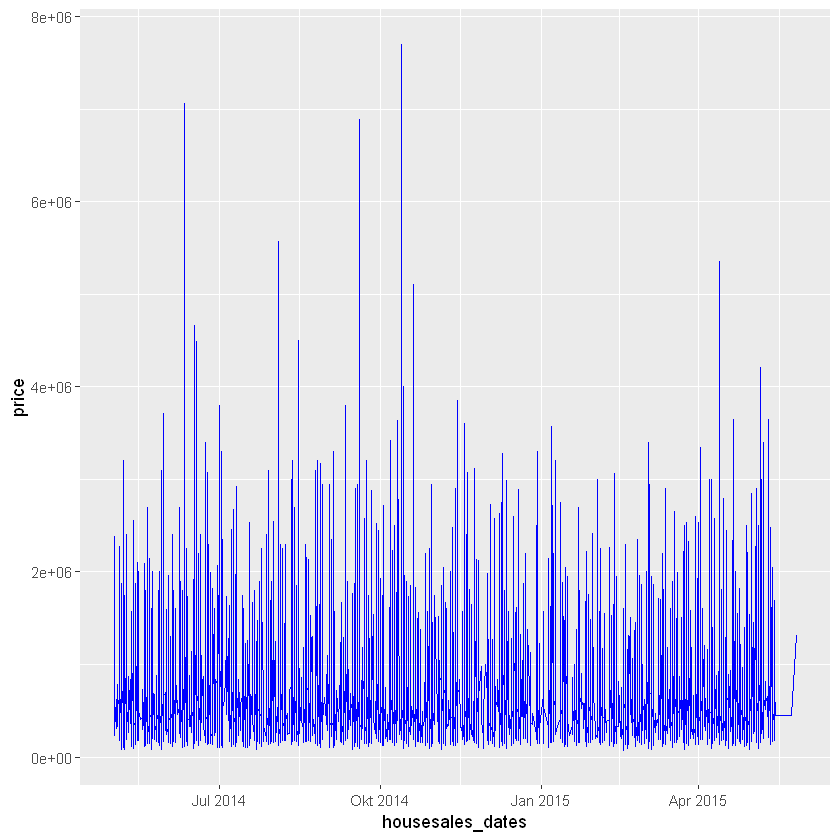

In [101]:
ggplot(housesales, aes(x=housesales_dates, y=price)) + geom_line(color= "blue") 
# Interpretation: not a trend given

In [102]:

install.packages("gapminder", repos='http://cran.us.r-project.org')
library(gapminder)


# Description
# An excerpt of the data available at Gapminder.org. For each of 142
# countries, the package provides values for life expectancy, GDP per capita,
# and population, every five years, from 1952 to 2007
# https://cran.r-project.org/web/packages/gapminder/gapminder.pdf
glimpse(gapminder)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpiGTs41\downloaded_packages


Warning message:
"package 'gapminder' was built under R version 3.5.3"

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


In [103]:
dim(gapminder)
head(gapminder)
names(gapminder)
summary(gapminder)
sum(is.na(gapminder))

[1] 1704    6

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

[1] 0